In [ ]:
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader

In [ ]:
x = np.random.normal(0,0.5,(100,10))
y = np.sum(x, axis=1)*np.random.normal(5,2,x.shape[0])

In [ ]:
# DataPredictor(PredictorParams('--regressor-type XGBRegressor --num-cv-folds 3')).

In [ ]:
import matplotlib.pyplot as plt
df = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first').df
df = df.select_dtypes(include = np.number)
# fig, (ax1, ax2) = plt.subplot(1,2)
df.columns

In [ ]:
y = 'frequency_of_period'
# y = 'waist'
df_notna = df[df[y].notna()]
df_isna = df[df[y].isna()]
df_notna.hist()
df_isna.hist()

In [ ]:
df_raw = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first').df
df_raw

In [ ]:
categorical_columns = df_raw.select_dtypes(include=['object']).columns.tolist()
nunique = df_raw.nunique(axis = 0, dropna = True)
nunique
# df_raw[categorical_columns[0]].unique()
# df_raw[:,df_raw.notna().sum()<500]
# df_drop = df_raw
# dff = df_drop.dropna(axis = 1, thresh = 500)
# dff.notna().sum()

In [ ]:
dffive = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present = 500).df

In [ ]:
dffive = pd.get_dummies(dffive, dummy_na = False, drop_first = True)
# nancheck = dffive['is_getting_period'].unique()
# np.isin(nancheck, [np.nan, None])

In [ ]:
dffive['dominant_hand'].nunique()

In [ ]:
import RSCV_p3 as rscv

help(rscv.main())

In [ ]:
x = dffive.loc[:, dffive.columns != 'waist']
y = dffive.loc[:, 'waist']
x

In [ ]:
from LabData.DataPredictors.PredictorParams import PredictorParams
from LabData.DataPredictors.DataPredictors import DataPredictor

res = DataPredictor(PredictorParams('--predictor_type LGBMRegressor --num_cv_folds 3')).fit(x,y)
res

In [ ]:
from LabUtils.addloglevels import sethandlers
from LabData.DataPredictors.DataPredictors import DataPredictor
sethandlers()
DataPredictor.use_cases()

In [ ]:
from LabData.DataLoaders import Lists
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader

df = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present = 500).df
df.to_csv()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.linear_model import LassoCV

# from LabData.DataLoaders.Loader import Loader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader

df = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500).df
df = df[[c for c
              in list(df)
              if (len(df[c].unique()) - 1 > 10 or len(df[c].unique()) - 1 == 2)]]
df = pd.get_dummies(df, dummy_na=False, drop_first=True)

# df = alter_categories(df)
y = 'waist'

relevant_patients = df[y].notna()  # consider only non-NAN patients
number_of_patients = relevant_patients.sum()  # if this is zero, we should skip this feature as y
df = df[relevant_patients]

# for y in df.columns:
# df_filtered, num_of_patients = get_relevant_patients_per_outcome(df, y)
# df_filtered = remove_nan_columns(df_filtered)
# df_filtered = remove_outliers(df_filtered)
# it shouldn't matter if it's done before train-test split as it randomly assigns them to each group

X = df.loc[:, df .columns != y]
Y = df .loc[:, y]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



2022-09-05 14:15:13 INFO Loader.py:497 Starting to load data for BodyMeasuresLoader
2022-09-05 14:15:13 INFO Caching.py:125 Loading body_measures from cache...
2022-09-05 14:15:14 INFO Loader.py:51 ***** BodyMeasuresLoader Loaded 72850 entries from 68424 subjects
2022-09-05 14:15:14 INFO Loader.py:501 Finished loading data for BodyMeasuresLoader
2022-09-05 14:15:14 INFO Loader.py:497 Starting to load data for SubjectLoader
2022-09-05 14:15:14 INFO Caching.py:125 Loading subjects from cache...
2022-09-05 14:15:15 INFO Loader.py:501 Finished loading data for SubjectLoader
2022-09-05 14:15:19 INFO timeutils.py:16  ***** get_data ***** Time elapsed: 5.87


In [16]:
type(y_train)

pandas.core.series.Series

In [ ]:
import GaussianMapping

x_train_transformed, x_test_transformed, y_train_transformed, y_test_transformed = GaussianMapping.make_gaussian (X_train, X_test, y_train, y_test, 0.005)

In [ ]:
imputer = KNNImputer(missing_values=np.nan ,n_neighbors = 5)
train_columns = X_train.columns
test_columns = X_test.columns
imputer = KNNImputer(copy=False, n_neighbors = 5)
train_data = imputer.fit_transform(X_train)
test_data = imputer.transform(X_test)
# train_imputed = pd.DataFrame(train_data, columns=train_columns)
# test_imputed = pd.DataFrame(test_data, test_columns)
#
# X_train = train_imputed
# X_test = test_imputed
# Before imputing the data, it might be a nice to see if they are missing at random or not
# impute_data(X_train, X_test)
#
# normalize(X_train, X_test)

train_data

In [ ]:
reg = LassoCV(fit_intercept=True, normalize=True, cv=5).fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.predict(X_test))
print(reg.get_params())

In [ ]:
(X_train['height'].values < 0).any()
X_train['height'].name

In [ ]:
reg.coef_

In [ ]:
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

gbm.feature_importance(importance_type='gain')

# gbm.feature_name()


In [ ]:
from lightgbm import plotting

plotting.plot_importance(gbm, importance_type='gain')#.set_xscale('log')

In [18]:
import pandas as pd
# import Predictors
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader

dffive = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500).df
dffive = pd.get_dummies(dffive, dummy_na=False, drop_first=True)

x = dffive.loc[:, dffive.columns != 'waist']
y = dffive.loc[:, 'waist']

# Predictors.predict(model='lightgbm', X=x, Y=y, k_folds=5)

2022-09-05 14:20:11 INFO Loader.py:497 Starting to load data for BodyMeasuresLoader
2022-09-05 14:20:11 INFO Caching.py:125 Loading body_measures from cache...
2022-09-05 14:20:12 INFO Loader.py:51 ***** BodyMeasuresLoader Loaded 72850 entries from 68424 subjects
2022-09-05 14:20:12 INFO Loader.py:501 Finished loading data for BodyMeasuresLoader
2022-09-05 14:20:12 INFO Loader.py:497 Starting to load data for SubjectLoader
2022-09-05 14:20:12 INFO Caching.py:125 Loading subjects from cache...
2022-09-05 14:20:13 INFO Loader.py:501 Finished loading data for SubjectLoader
2022-09-05 14:20:18 INFO timeutils.py:16  ***** get_data ***** Time elapsed: 6.13


In [ ]:
import os
os.environ['PYTHONPATH']

In [20]:
import os
import time

import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import shap
import lightgbm as lgb

from LabData import config_global as config

# LightGBM
lg_boosting_type = 'gbdt'
lg_objective = 'regression'
lg_metric = 'l2'
lg_learning_rate = 0.03
lg_num_leaves = 31
lg_max_depth = 4
lg_num_iterations = 2000
lg_min_data_in_leaf = 20
lg_feature_fraction = 0.1
lg_bagging_fraction = 0.7
lg_bagging_freq = 1
lg_lambda_l1 = 0
lg_early_stopping_round = None
lg_verbose = -1
lg_num_threads = 2
lg_silent = True

# LightGBM hyper parameter search
hyper_params_dict_lg = \
    {
        'boosting_type': ['gbdt'],
        'objective': ['regression'],
        'metric': ['l2'],
        'learning_rate': [0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001],
        'num_leaves': range(2, 35),
        'max_depth': [-1, 2, 3, 4, 5, 10],
        'num_iterations': range(100, 2500, 50),
        'min_data_in_leaf': range(5, 100, 5),
        'feature_fraction': [i / 10. for i in range(2, 11)],  # [1] when using dummy variables
        'bagging_fraction': [i / 10. for i in range(4, 11)],
        'bagging_freq': [1],
        'lambda_l1': [0, 0.001, 0.005, 0.01],
        'early_stopping_round': [None],
        'verbose': [-1],
        'num_threads': [2],
        'silent': [True],
    }


def fit_hyper_params_search(x, y, sample_weight=None):
    lgb_regressor = lgb.LGBMRegressor()
    rscv = RandomizedSearchCV(lgb_regressor, hyper_params_dict_lg)
    rscv.fit(x, y)
    predictor = rscv.best_estimator_
    model = predictor
    return model


def calc_shap(model, x):
    explainer = shap.TreeExplainer(model)
    x_shap = x
    shap_values = explainer.shap_values(x_shap)
    shap_df = DataFrame(columns=x.columns, index=x_shap.index, data=shap_values)
    return shap_df, shap_values


def get_prediction(x: DataFrame, model: lgb.LGBMRegressor):
    return model.predict(x).ravel()

def r(yhat, y):
    return pearsonr(y, yhat)[0]


def LGBMPredict(x: DataFrame, y: DataFrame):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    model = fit_hyper_params_search(x_train, y_train)
    shap_df, shap_values = calc_shap(model, x_test)
    y_hat = get_prediction(x_test, model)
    return shap_df, shap_values, model, y_test, y_hat

shap_df, shap_values, model, y_test, y_hat = LGBMPredict(x, y)

Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument
Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_r

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
  File "/usr/wisdom/python-3.

[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
Found `num_iterations` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument


[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [27]:
pd.DataFrame(y_hat, columns=[y.name])

,waist
0,104.294490
1,79.859081
2,77.592856
3,83.158869
4,90.722054
...,...
1615,91.036252
1616,88.147624
1617,89.625987
1618,69.899293


In [81]:
model.booster_.save_model('lgbr_base.txt')

In [87]:
remodel = lgb.Booster(model_file='lgbr_base.txt')
remodel.feature_name()

['sepal_length_(cm)',
 'sepal_width_(cm)',
 'petal_length_(cm)',
 'petal_width_(cm)']

In [ ]:
shap.summary_plot(shap_values, plot_size=(10,10))

In [78]:
with open("tmp_shap","rb") as ffff:
    rexplainer = pickle.load(ffff)

EOFError: Ran out of input

In [105]:
import pandas as pd
# shap.summary_plot(pd.DataFrame(shap_values, columns=X.columns, index=X.index))
pd.DataFrame(shap_values.data, shap)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [105]:
with open("tmp.shap", "rb") as ff:
    loaded = shap.Explainer.load(ff)

loaded.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
from LabData.DataLoaders.BloodTestsLoader import BloodTestsLoader

df = BloodTestsLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,).df

df.hist()

In [72]:
import pickle
with open("tmp_shap","wb") as fff:
    pickle.dump(shap_values, fff)

In [ ]:
import pandas as pd
merged = pd.merge(dffive, df, left_index=True, right_index=True)
merged

In [4]:
from LabData.DataMergers.DataMerger import DataMerger
from LabData.DataLoaders.BloodTestsLoader import BloodTestsLoader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from LabData.DataLoaders.DiagnosesLoader import DiagnosesLoader

blood = BloodTestsLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500)
body = BodyMeasuresLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500, norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8})
subjects = SubjectLoader().get_data(study_ids='10K', groupby_reg='first')
diagnoses = DiagnosesLoader().get_data(study_ids='10K', groupby_reg='first')



2022-03-05 15:57:01 INFO Loader.py:497 Starting to load data for BloodTestsLoader
2022-03-05 15:57:01 INFO Caching.py:125 Loading blood_tests from cache...
2022-03-05 15:57:02 INFO Loader.py:51 ***** BloodTestsLoader Loaded 94226 entries from 70237 subjects
2022-03-05 15:57:02 INFO Loader.py:501 Finished loading data for BloodTestsLoader
2022-03-05 15:57:05 INFO Loader.py:497 Starting to load data for SubjectLoader
2022-03-05 15:57:05 INFO Caching.py:125 Loading subjects from cache...
2022-03-05 15:57:05 INFO Loader.py:501 Finished loading data for SubjectLoader
2022-03-05 15:57:08 INFO timeutils.py:16  ***** get_data ***** Time elapsed: 7.65
2022-03-05 15:57:09 INFO Loader.py:497 Starting to load data for BodyMeasuresLoader
2022-03-05 15:57:09 INFO Caching.py:125 Loading body_measures from cache...
2022-03-05 15:57:09 INFO Loader.py:51 ***** BodyMeasuresLoader Loaded 72850 entries from 68424 subjects
2022-03-05 15:57:09 INFO Loader.py:501 Finished loading data for BodyMeasuresLoader
2

In [ ]:
body.df.shape

In [70]:
from pandas import Timedelta
blood_df = blood.df
body_df = body.df


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [70]:
blood_df.columns

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
import os
import sys
import xgboost
import shap

X,y = shap.datasets.iris()
model = xgboost.XGBRegressor().fit(X,y)

explainer = shap.Explainer(model)
shap_values = explainer(X)
# os.chdir('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/')
# with open("tmp.shap","wb") as f:
#     explainer.save(f)
# shap.plots.force(shap_values)

2022-03-05 15:57:26 INFO DataMerger.py:148 Uniting X matrices
2022-03-05 15:57:26 INFO DataMerger.py:89 Joining dfs how=left
2022-03-05 15:57:26 INFO DataMerger.py:36 Pre-join X0: 10442 rows, 100 cols, indices=['RegistrationCode', 'Date']
2022-03-05 15:57:26 INFO DataMerger.py:36 Pre-join X1: 8100 rows, 31 cols, indices=['RegistrationCode', 'Date']


MergeError: incompatible merge keys [1] dtype('O') and dtype('<M8[ns]'), must be the same type

In [ ]:
merged = DataMerger([blood, body])
xm = merged.get_x(inexact_index='Date', res_index_names=['RegistrationCode', 'Date'])
xm.df.shape

In [ ]:
body_df[~body_df.index.get_level_values('Date')].sort_index(level='Date')

In [ ]:
blood.df.index.names
blood_reduces = blood.df.droplevel(level=1)
body_reduces = body.df.droplevel(level=1)

xmm = pd.merge(blood_reduces, body_reduces, right_index=True, left_index=True)
xmm.columns

In [42]:
from LabData.DataLoaders.SerumMetabolomicsLoader import SerumMetabolomicsLoader

sm = SerumMetabolomicsLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,
                                                norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8}
                                                , precomputed_loader_fname='metab_10k_data_RT_clustering')
# MetabolonLoader().use_cases()

In [359]:
x_ag = sm.df_metadata[['gender','age']]
x_ag

,gender,age
SerumName,,
9018750047_10_LV1003679758,0.0,53.0
2302377468_10_LV1003679746,0.0,49.0
1156163709_10_LV1003679789,1.0,43.0
8000222851_10_LV1003679778,0.0,47.0
7498156799_10_LV1003679790,1.0,46.0
...,...,...
3820358393_10_LV1016274627,0.0,51.0
8335120058_10_LV1016274128,0.0,41.0
4091775581_10_LV1016274045,0.0,58.0


In [ ]:
sm.df_metadata['RegistrationCode'].value_counts()
sm.df_metadata[sm.df_metadata.RegistrationCode=='10K_1345235500']

In [ ]:
sm_df = sm.df.set_index(sm.df_metadata.RegistrationCode.drop_duplicates())

In [ ]:
blood_reduces[blood_reduces.index.isin(sm.df.set_index(sm.df_metadata.RegistrationCode.drop_duplicates()).index)]

In [ ]:
blood_reindex = blood_reduces.reindex(sm_df.index).dropna(how='all').copy()

In [ ]:
blood_reindex

In [ ]:
sm_df.loc[['10K_9018750047']]

In [ ]:
sm_df = sm_df.reindex(blood_reindex.index)

In [ ]:
from LabData.DataLoaders.SerumMetabolomicsLoader import SerumMetabolomicsLoader
smbld = SerumMetabolomicsLoader().get_data(precomputed_loader_fname='metab_10k_data_RT_clustering',study_ids='10K', groupby_reg='first', min_col_present=500,norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8})

In [89]:
smbld.df

,Lipids_NEG_213.0551_31.1470_150.8722,Lipids_NEG_217.0025_30.9563_142.6050,Lipids_NEG_232.9752_30.7462_142.0463,Lipids_NEG_194.9054_31.5023_122.7051,Lipids_NEG_259.0096_32.6407_265.7862,Lipids_NEG_255.8219_33.2194_130.6976,Lipids_NEG_162.8391_33.8351_108.4717,Lipids_NEG_373.0100_35.5757_173.8172,Lipids_NEG_174.0986_36.9306_140.8142,Lipids_NEG_172.9911_36.9286_129.8889,...,Lipids_POS_1757.5505_448.5294_591.4928,Lipids_POS_1766.5369_461.3906_591.9430,Lipids_POS_1770.5687_478.4384_593.5832,Lipids_POS_1713.5823_478.9679_586.4714,Lipids_POS_1792.5547_460.4830_595.1900,Lipids_POS_1244.3605_492.4100_354.9595,Lipids_POS_1474.1123_372.3885_474.0814,Lipids_POS_1797.5836_455.3832_600.0766,Lipids_POS_1817.6462_477.9538_610.7669,Lipids_POS_356.3520_202.2460_210.9004
SerumName,,,,,,,,,,,,,,,,,,,,,
9018750047_10_LV1003679758,-1.684810,-0.485782,1.490305,-3.085552,-0.649288,0.211747,0.923378,-2.995648,-1.813691,0.066048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302377468_10_LV1003679746,-2.171692,-0.378804,3.252638,-2.410482,-0.764603,0.467780,1.375945,-3.729037,-1.547291,-1.735283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156163709_10_LV1003679789,-1.936906,-0.729343,1.443055,-2.383031,1.495341,0.210996,0.951642,-1.187971,0.686279,-0.737882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8000222851_10_LV1003679778,-1.123428,-1.494893,1.377108,-2.626925,-0.496530,0.470069,0.938949,-1.626023,-1.254751,0.982474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498156799_10_LV1003679790,-1.805166,-0.163441,1.300626,-2.476073,-1.958744,0.431923,1.197551,-0.554004,-1.061795,1.488520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820358393_10_LV1016274627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.783503,NaN,NaN,NaN,-1.060575
8335120058_10_LV1016274128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.406118,NaN,NaN,NaN,-1.193360
4091775581_10_LV1016274045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.424081,NaN,NaN,NaN,-0.568062


In [ ]:
from LabUtils.addloglevels import sethandlers
from LabQueue.qp import qp

sethandlers(file_dir='/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/')
# os.chdir('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/')

def plus(x,y):
    return x+y

with qp(jobname='Gal_LGBM', _delete_csh_withnoerr=True, q=['himem7.q'], _trds_def=2, max_u=200, _mem_def=2) as q:
    q.startpermanentrun()
    tkttores = {}

    for i in range(3):
        for j in range(2):
            tkttores[(i,j)] =q.method(plus, (i, j))

    tkttores = {k:q.waitforresult(v) for k,v in tkttores.iteritems()}

In [1]:
import os
import numpy as np
from LabUtils.addloglevels import sethandlers
from LabQueue.qp import qp

sethandlers(file_dir='/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/')
os.chdir('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/')

def plus(x, y):
    z=x+y
    # print(z)
    return z, x, y, np.array([x,y,z])

with qp(jobname='Gal_LGBM', _delete_csh_withnoerr=True, q=['himem7.q'], _trds_def=2, max_u=200, _mem_def=2) as q:
    q.startpermanentrun()
    tkttores = {}

    for i in range(3):
        for j in range(2):
            tkttores[f'{i}{j}'] =q.method(plus, (i, j))
            # print(tkttores[(i,j)])
            # print(f'tkt={+tkttores[(i,j)]}')
            # print(f'i={i}')
            # print(f'j={j}')
            # print(f'z={plus(i,j)}')

    tkttores = {k:q.waitforresult(v) for k,v in tkttores.items()}
    tkttores

2022-09-05 13:50:27 INFO qp.py:1113 Sending to queue (mem 2, threads 2): (Gal.LG_UWt) /usr/wisdom/python-3.7.4/bin/python3.7 -W ignore /home/galavner/PycharmProjects/LabQueue/LabQueue/qworker.py /net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/Gal.LGBM_c68111acef834f778aca64c9bf1945d1/0.dat;
2022-09-05 13:50:30 INFO qp.py:1113 Sending to queue (mem 2, threads 2): (Gal.LG_0SZ) /usr/wisdom/python-3.7.4/bin/python3.7 -W ignore /home/galavner/PycharmProjects/LabQueue/LabQueue/qworker.py /net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/Gal.LGBM_c68111acef834f778aca64c9bf1945d1/1.dat;
2022-09-05 13:50:30 INFO qp.py:1113 Sending to queue (mem 2, threads 2): (Gal.LG_05f) /usr/wisdom/python-3.7.4/bin/python3.7 -W ignore /home/galavner/PycharmProjects/LabQueue/LabQueue/qworker.py /net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/Gal.LGBM_c68111acef834f778aca64c9bf1945d1/2.dat;
2022-09-05 13:50:30 INFO qp.py:1113 Sending to queue (mem 2, threads 2): (Ga

In [60]:
import pandas as pd
results=pd.DataFrame(tkttores).T
results.columns=['x_test','y_pred','model','resuls_df']
results.to_csv('df_test.csv')

reresults=pd.read_csv('df_test.csv')
reresults.index = reresults.iloc[:,0]
reresults.drop(reresults.columns[0],axis=1)
# reresults


,x_test,y_pred,model,resuls_df
Unnamed: 0,,,,
0,0,0,0,[0 0 0]
1,1,0,1,[0 1 1]
10,1,1,0,[1 0 1]
11,2,1,1,[1 1 2]
20,2,2,0,[2 0 2]
21,3,2,1,[2 1 3]


In [85]:
from LabData.DataLoaders.SerumMetabolomicsLoader import SerumMetabolomicsLoader
smbld = SerumMetabolomicsLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,
                                                norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8},precomputed_loader_fname='metab_10k_data_RT_clustering')
smbld.df

,Lipids_NEG_213.0551_31.1470_150.8722,Lipids_NEG_217.0025_30.9563_142.6050,Lipids_NEG_232.9752_30.7462_142.0463,Lipids_NEG_194.9054_31.5023_122.7051,Lipids_NEG_259.0096_32.6407_265.7862,Lipids_NEG_255.8219_33.2194_130.6976,Lipids_NEG_162.8391_33.8351_108.4717,Lipids_NEG_373.0100_35.5757_173.8172,Lipids_NEG_174.0986_36.9306_140.8142,Lipids_NEG_172.9911_36.9286_129.8889,...,Lipids_POS_1757.5505_448.5294_591.4928,Lipids_POS_1766.5369_461.3906_591.9430,Lipids_POS_1770.5687_478.4384_593.5832,Lipids_POS_1713.5823_478.9679_586.4714,Lipids_POS_1792.5547_460.4830_595.1900,Lipids_POS_1244.3605_492.4100_354.9595,Lipids_POS_1474.1123_372.3885_474.0814,Lipids_POS_1797.5836_455.3832_600.0766,Lipids_POS_1817.6462_477.9538_610.7669,Lipids_POS_356.3520_202.2460_210.9004
SerumName,,,,,,,,,,,,,,,,,,,,,
9018750047_10_LV1003679758,-1.684810,-0.485782,1.490305,-3.085552,-0.649288,0.211747,0.923378,-2.995648,-1.813691,0.066048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302377468_10_LV1003679746,-2.171692,-0.378804,3.252638,-2.410482,-0.764603,0.467780,1.375945,-3.729037,-1.547291,-1.735283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156163709_10_LV1003679789,-1.936906,-0.729343,1.443055,-2.383031,1.495341,0.210996,0.951642,-1.187971,0.686279,-0.737882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8000222851_10_LV1003679778,-1.123428,-1.494893,1.377108,-2.626925,-0.496530,0.470069,0.938949,-1.626023,-1.254751,0.982474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498156799_10_LV1003679790,-1.805166,-0.163441,1.300626,-2.476073,-1.958744,0.431923,1.197551,-0.554004,-1.061795,1.488520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820358393_10_LV1016274627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.783503,NaN,NaN,NaN,-1.060575
8335120058_10_LV1016274128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.406118,NaN,NaN,NaN,-1.193360
4091775581_10_LV1016274045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.424081,NaN,NaN,NaN,-0.568062


In [415]:
smbld_df = smbld.df
smbld_md = smbld.df_metadata
smbld_df['age'] = smbld_md['age']
smbld_df['gender'] = smbld_md['gender']
smbld_df = smbld_df.set_index(smbld_md.RegistrationCode.drop_duplicates())
smbld_df[['age','gender']]

,age,gender
RegistrationCode,,
10K_9018750047,53.0,0.0
10K_2302377468,49.0,0.0
10K_1156163709,43.0,1.0
10K_8000222851,47.0,0.0
10K_7498156799,46.0,1.0
...,...,...
10K_3820358393,51.0,0.0
10K_8335120058,41.0,0.0
10K_4091775581,58.0,0.0


In [61]:
from LabData.DataLoaders.BloodTestsLoader import BloodTestsLoader
btld = BloodTestsLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,
                                                norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8})
btld.df.notna().sum().sort_values(ascending=True)

2022-09-05 14:50:47 INFO Loader.py:497 Starting to load data for BloodTestsLoader
2022-09-05 14:50:47 INFO Caching.py:125 Loading blood_tests from cache...
2022-09-05 14:50:52 INFO Loader.py:51 ***** BloodTestsLoader Loaded 94226 entries from 70237 subjects
2022-09-05 14:50:53 INFO Loader.py:501 Finished loading data for BloodTestsLoader
2022-09-05 14:50:57 INFO Loader.py:497 Starting to load data for SubjectLoader
2022-09-05 14:50:57 INFO Caching.py:125 Loading subjects from cache...
2022-09-05 14:50:57 INFO Loader.py:501 Finished loading data for SubjectLoader
2022-09-05 14:51:03 INFO timeutils.py:16  ***** get_data ***** Time elapsed: 15.71


bt__prolactin                  497
bt__pt_%                       538
bt__testosterone               565
bt__estradiol_e2               572
bt__lh_luteinizing_hormone     647
                              ... 
bt__lymphocytes_abs           9715
bt__mchc                      9717
bt__lymphocytes_%             9730
bt__basophils_%               9742
bt__glucose                   9799
Length: 100, dtype: int64

In [202]:
for i, y in enumerate(btld.df.columns):
    print(i,y)

0 bt__neutrophils_abs
1 bt__cpk
2 bt__creatinine
3 bt__alt_gpt
4 bt__rbc
5 bt__rbc_micro_hypo_ratio
6 bt__uric_acid
7 bt__basophils_%
8 bt__alkaline_phosphatase
9 bt__bilirubin_direct
10 bt__t4_free
11 urine__albumin_creatinine_ratio
12 bt__mcv
13 bt__ggt
14 bt__platelets
15 urine__nitrite
16 bt__ldl_cholesterol_calc
17 bt__lymphocytes_%
18 bt__mchc
19 bt__ptt
20 bt__phosphorus
21 bt__non_hdl_cholesterol
22 urine__bilirubin
23 bt__rbc_hyper_%
24 urine__erythrocytes
25 bt__hba1c
26 bt__vitamin_b12
27 bt__bilirubin_total
28 bt__crp_wide_range
29 bt__monocytes_%
30 bt__ast_got
31 bt__hdl_cholesterol
32 bt__magnesium
33 bt__iga
34 bt__ferritin
35 bt__pt
36 bt__ldh
37 bt__calcium
38 bt__vitamin_d
39 bt__mch
40 bt__luc_%
41 bt__lh_luteinizing_hormone
42 bt__platelet_large_cell_ratio
43 bt__chlorid
44 bt__rdw
45 bt__immature_granulocytes
46 bt__pt_%
47 urine__microalbumin
48 bt__hemoglobin
49 bt__egfr
50 bt__basophils_abs
51 bt__t3_free
52 urine__sg
53 bt__hct
54 urine__glucose
55 bt__luc_abs

In [68]:
type(y_train)

pandas.core.series.Series

In [ ]:
from scipy.stats import pearsonr, spearmanr

print(pearsonr(y_test,y_hat))
print(spearmanr(y_test,y_hat))

In [52]:
sales = [{'account': 'Jones LLC', 'pear': [150,433], 'Feb': 200, 'Mar': 140},
         {'account': 'Alpha Co',  'pear': [200,3], 'Feb': 210, 'Mar': 215},
         {'account': 'Blue Inc',  'pear': [50,666],  'Feb': 90,  'Mar': 95 }]
dict={'pearson':333,'model': 334,'yhat':882}
ind = ['bt1','bt2','bt3']
df = pd.DataFrame(sales)
# df.pear.iloc[:].to_numpy
# pd.DataFrame(dict, index=['y_name'])
df.index = ind
df.columns=['p', 'm', 'yh', 'dd']
df

,p,m,yh,dd
bt1,Jones LLC,"[150, 433]",200,140
bt2,Alpha Co,"[200, 3]",210,215
bt3,Blue Inc,"[50, 666]",90,95


In [44]:
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, explained_variance_score, precision_recall_curve
y_pred=y_hat
results_dict = {
    'Coefficient_of_determination': r2_score(y_true=y_test, y_pred=y_pred),
    'explained_variance_score': explained_variance_score(y_true=y_test, y_pred=y_pred),
    'pearson_r': pearsonr(y_pred, y_test)[0],
    'pearson_p_value': pearsonr(y_pred,y_test)[1],
    'spearman_r': spearmanr(y_pred, y_test)[0],
    'spearman_p_value': spearmanr(y_pred, y_test)[1]
}
results_dicts = []
results_dicts.append(results_dict)
results_dicts
results_df=pd.DataFrame(results_dicts, index=ind)
# results_df.pearson_r

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [215]:
shap_values=explainer.shap_values(X)
shap_values.feature_names

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [126]:
import pandas as pd
import ast

results = pd.read_csv('Results_SerumMetabolomics.csv')
results.index = results[results.columns[0]]
results=results.drop(columns=results.columns[0])
# data=results['results_dict'].tolist()
for i in range(len(results.index)):
    results.results_dict[i]=ast.literal_eval(results['results_dict'].tolist()[i])
metrics = pd.json_normalize(data=results['results_dict'].tolist())
metrics.index = results.index
metrics.index.name = 'bt'
metrics

,Coefficient_of_determination,explained_variance_score,pearson_r,pearson_p_value,spearman_r,spearman_p_value
bt,,,,,,
bt__lymphocytes_abs,0.081492,0.081643,0.287349,3.071569e-21,0.299609,4.931932e-23
bt__monocytes_abs,0.060217,0.064667,0.254298,9.394188e-17,0.251212,2.249718e-16


<AxesSubplot:>

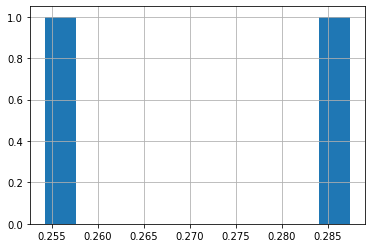

In [128]:
import matplotlib.pyplot as plt
metrics['pearson_r'].hist()

In [155]:
pd.DataFrame([x.split(';') for x in results.y_test[0].split('\n')[1:]], columns=[x for x in results.y_test[0].split('\n')[0].split(';')])

,bt__lymphocytes_abs
0,RegistrationCode
1,10K_5510222220 3.10
2,10K_9271931407 1.88
3,10K_4048778768 1.39
4,10K_7864200903 1.52
5,10K_1421463295 2.81
6,... ...
7,10K_4343404583 1.80
8,10K_9077746225 1.80
9,10K_4154401192 1.90


In [142]:
pd.read_csv(results.y_test[1])

OSError: [Errno 36] File name too long: '                  bt__monocytes_abs\nRegistrationCode                   \n10K_3191586167                0.365\n10K_1920329410                0.430\n10K_6783138092                0.300\n10K_7823323894                0.500\n10K_3966030675                0.710\n...                             ...\n10K_3811934325                0.320\n10K_7373255955                0.300\n10K_9922937534                0.370\n10K_6808784218                0.730\n10K_3413366048                0.610\n\n[1036 rows x 1 columns]'

In [166]:
import pickle
base_path = "/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/"
with open(os.path.join(base_path, 'tkttores'), 'wb') as f:
    pickle.dump(y_test, f)

In [167]:
with open(os.path.join(base_path, 'tkttores'), 'rb') as f:
    tickettores = pickle.load(f)
tickettores

RegistrationCode  Date                      
10K_3972756300    2020-03-03 12:57:58.888285    104.0
10K_4309130772    2021-04-29 09:36:06.895123     77.0
10K_2742799748    2022-04-12 07:56:50.855372     77.0
10K_4260911348    2020-01-19 10:34:17.895874     83.0
10K_9385494801    2019-06-30 08:47:43.072054     94.0
                                                ...  
10K_1872865369    2021-02-16 08:57:24.938435     91.0
10K_3141775351    2019-11-25 10:00:13.262950     87.0
10K_9264308436    2022-01-30 06:33:01.160528     97.0
10K_8013605064    2020-05-27 08:03:02.354959     63.0
10K_7522107106    2022-03-27 08:36:30.268418     72.0
Name: waist, Length: 1620, dtype: float64

In [191]:
import pickle

with open('Results_SM_pickle', 'rb') as f:
    results_df = pickle.load(f)

In [197]:
metrics = results_df['results_dict']
metrics = pd.json_normalize(data=metrics.to_list())
metrics.index = results_df.index

y_test_df=results_df['y_test']

bt__neutrophils_%                      bt__neutrophils_%
Registrati...
bt__basophils_abs                      bt__basophils_abs
Registrati...
Name: y_test, dtype: object

In [200]:
y_test_temp = pd.DataFrame()
for i in range(len(y_test_df)):
    y_test_temp.append(y_test_df[i])
y_test_temp

""


In [15]:
import pickle

with open('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_SM/Results_SM_pickle', 'rb') as f:
    results_sm = pickle.load(f)

In [16]:
metrics_sm = results_sm['results_dict']
metrics_sm = pd.json_normalize(data=metrics_sm.tolist())
metrics_sm.index = results_sm.index
# np.argmax(metrics_sm.pearson_r) - np.argmax(metrics_sm.spearman_r)
# np.argmin(metrics.pearson_r) - np.argmin(metrics.spearman_r)
# np.argmin(metrics_sm.spearman_r)

In [324]:
y_pred = results_df.y_pred
y_test = results_df.y_test
y = results_df[['y_test', 'y_pred']]
y_test[0].columns[0]

'bt__ldh'

(array([  1.,   6.,   8.,  34., 134., 109.,  79.,  15.,   5.,   3.]),
 array([-266.22603317, -214.35972464, -162.49341612, -110.62710759,
         -58.76079907,   -6.89449055,   44.97181798,   96.8381265 ,
         148.70443503,  200.57074355,  252.43705208]),
 <BarContainer object of 10 artists>)

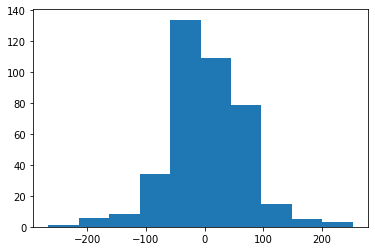

In [344]:
plt.hist(y_test[0] - y_pred[0])

Text(0.55, 0.05, '$R^2=$0.6098171014868105')

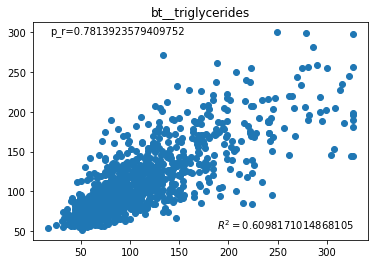

In [349]:
i=5
plt.scatter(y_test[i].sort_index(), y_pred[i].sort_index())
# plt.text(max(plt.xticks()),min(plt.yticks()),f'p_r={metrics.pearson_r[i]}')
# plt.text(500,300, f'R^2={metrics.Coefficient_of_determination[i]}')
plt.title(y_test[i].columns[0])
plt.annotate(f'p_r={metrics.pearson_r[i]}', xy=(0.05,0.95), xycoords='axes fraction')
plt.annotate(fr'$R^2=${metrics.Coefficient_of_determination[i]}', xy=(0.55,0.05), xycoords='axes fraction')

IndexError: index 64 is out of bounds for axis 0 with size 64

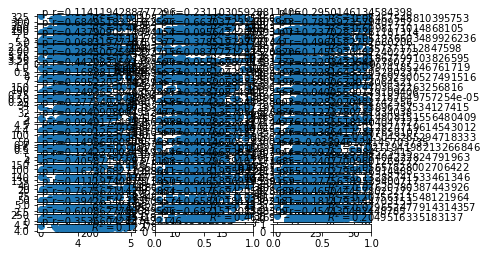

In [294]:
fig, axs = plt.subplots(22,3)
count = 0
for i in range(22):
    for j in range(3):
        if i*j > len(y_test):
            break
        axs[i,j].scatter(y_test[count].sort_index(), y_pred[count].sort_index())
        axs[i,j].annotate(f'p_r={metrics.pearson_r[count]}', xy=(0.05,0.95), xycoords='axes fraction')
        axs[i,j].annotate(fr'$R^2=${metrics.Coefficient_of_determination[count]}', xy=(0.55,0.05), xycoords='axes fraction')
        count = count+1

In [13]:
import pickle
import os

os.chdir('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_age_gender/')
os.getcwd()

with open('Results_AG_pickle', 'rb') as f:
    results_ag = pickle.load(f)
# with open('Results_AG_pickle','rb') as f:
#     results_ag = pickle.load(f)

metrics_ag = results_ag['results_dict']
metrics_ag =pd.json_normalize(metrics_ag)
metrics_ag.index = results_ag.index
y_pred_ag = results_ag.y_pred
y_test_ag = results_ag.y_test

In [264]:
metrics = pd.json_normalize(data=metrics.tolist())
metrics

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [319]:
metrics.index = results_df.index
metrics['pearson_r'].hist

<bound method hist_series of bt__ldh                  0.114119
bt__neutrophils_%        0.231103
bt__ast_got              0.295015
bt__total_cholesterol    0.684952
bt__uric_acid            0.663037
                           ...   
bt__rdw                  0.181479
bt__ferritin             0.600863
bt__hemoglobin           0.682151
bt__alt_gpt              0.454430
bt__albumin              0.353660
Name: pearson_r, Length: 64, dtype: float64>

(array([1., 3., 8., 7., 7., 6., 5., 5., 8., 2., 0., 2., 3., 5., 2.]),
 array([-0.03394612,  0.02040977,  0.07476567,  0.12912157,  0.18347747,
         0.23783337,  0.29218927,  0.34654517,  0.40090107,  0.45525697,
         0.50961286,  0.56396876,  0.61832466,  0.67268056,  0.72703646,
         0.78139236]),
 <BarContainer object of 15 artists>)

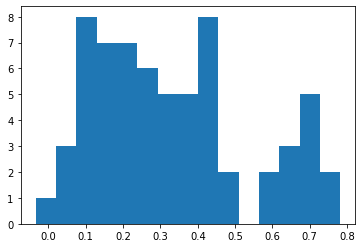

In [304]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplot()
plt.hist(metrics['pearson_r'],bins=15)
# plt.set_title('pearson_r')

(array([16., 12.,  9.,  6.,  4.,  4.,  1.,  0.,  1.,  1.,  3.,  4.,  1.,
         0.,  2.]),
 array([-0.0211942 ,  0.02087322,  0.06294064,  0.10500806,  0.14707548,
         0.1891429 ,  0.23121032,  0.27327774,  0.31534516,  0.35741258,
         0.39948   ,  0.44154742,  0.48361484,  0.52568226,  0.56774968,
         0.6098171 ]),
 <BarContainer object of 15 artists>)

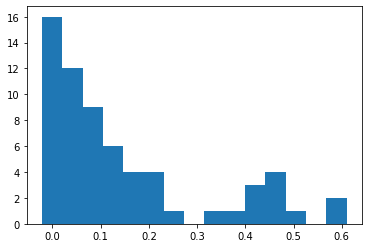

In [305]:
plt.hist(metrics['Coefficient_of_determination'],bins=15)

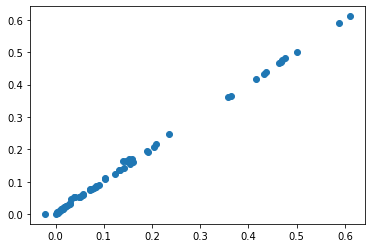

In [335]:
plt.scatter(metrics['Coefficient_of_determination'], metrics['pearson_r']**2)

(array([11., 14., 12.,  8.,  7.,  2.,  3.,  3.,  2.,  2.]),
 array([-0.00118005,  0.06883474,  0.13884952,  0.20886431,  0.27887909,
         0.34889388,  0.41890866,  0.48892345,  0.55893823,  0.62895302,
         0.6989678 ]),
 <BarContainer object of 10 artists>)

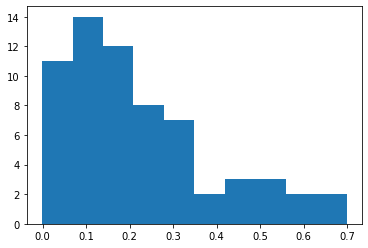

In [14]:
plt.hist(metrics_ag['spearman_r'])

In [395]:
print(f'max={np.argmax(metrics_ag.pearson_r)},{np.max(metrics_ag.pearson_r)} min={np.argmin(metrics_ag.pearson_r)}')
i=42
# plt.scatter(y_test_ag[i],y_pred_ag[i])
print(y_pred_ag[i])
print(y_test_ag[i])

max=42,0.6651278823612312 min=2
                  urine__albumin_creatinine_ratio
RegistrationCode                                 
10K_3093256379                           4.235726
10K_6374382371                           4.263821
10K_6463786344                           4.462640
10K_6752397683                           4.802069
10K_9593782533                           5.484142
...                                           ...
10K_7833168704                           3.943471
10K_4711666661                           4.009706
10K_5996403249                           4.608472
10K_1977866627                           5.199064
10K_5389602887                           4.232801

[230 rows x 1 columns]
                  urine__albumin_creatinine_ratio
RegistrationCode                                 
10K_3093256379                               6.85
10K_6374382371                               0.00
10K_6463786344                               0.00
10K_6752397683                              

In [11]:
import pickle

with open('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_SM_age_gender/Results_SMAG_pickle', 'rb') as f:
    smag = pickle.load(f)

In [12]:
import pandas as pd
metrics_smag = smag['results_dict']
metrics_smag = pd.json_normalize(metrics_smag)
metrics_smag.index = smag.index
metrics_smag

,Coefficient_of_determination,explained_variance_score,pearson_r,pearson_p_value,spearman_r,spearman_p_value
bt__hct,0.452194,0.454350,0.678156,2.819156e-141,0.682055,1.656526e-143
bt__egfr,0.265110,0.266942,0.518057,6.434087e-29,0.531811,1.175505e-30
bt__luc_%,-0.000255,0.000956,0.031874,5.615900e-01,0.043171,4.316455e-01
bt__potassium,0.011158,0.011794,0.111527,4.566687e-04,0.094696,2.945265e-03
bt__rdw,0.038929,0.039912,0.205566,2.913526e-11,0.195533,2.621229e-10
...,...,...,...,...,...,...
bt__monocytes_%,0.046511,0.046583,0.227865,1.308371e-13,0.227854,1.311859e-13
bt__protein_total,0.063453,0.064468,0.253945,6.703454e-13,0.233226,4.653453e-11
bt__mcv,0.071051,0.071309,0.268995,1.069543e-18,0.270232,7.328979e-19
bt__mchc,0.089396,0.089889,0.301451,2.482306e-23,0.299414,5.030342e-23


(array([ 4., 10.,  6., 12.,  7.,  7.,  6.,  1.,  6.,  5.]),
 array([-0.01120628,  0.06798798,  0.14718225,  0.22637652,  0.30557078,
         0.38476505,  0.46395932,  0.54315358,  0.62234785,  0.70154212,
         0.78073638]),
 <BarContainer object of 10 artists>)

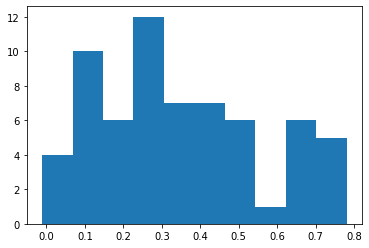

In [421]:
plt.hist(metrics_smag['pearson_r'])

In [424]:
print(np.argmax(metrics_smag.pearson_r))
print(np.argmin(metrics_smag.pearson_r))
y_test_smag = smag.y_test
y_pred_smag = smag.y_pred

20
47


Text(0.55, 0.05, '$R^2=$0.6086771116201533')

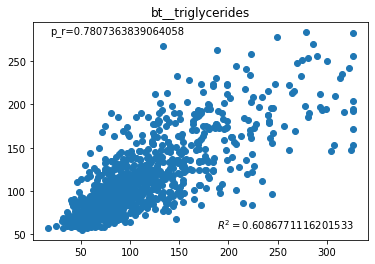

In [427]:
i=20
plt.scatter(y_test_smag[i].sort_index(), y_pred_smag[i].sort_index())
# plt.text(max(plt.xticks()),min(plt.yticks()),f'p_r={metrics.pearson_r[i]}')
# plt.text(500,300, f'R^2={metrics.Coefficient_of_determination[i]}')
plt.title(y_test_smag[i].columns[0])
plt.annotate(f'p_r={metrics_smag.pearson_r[i]}', xy=(0.05,0.95), xycoords='axes fraction')
plt.annotate(fr'$R^2=${metrics_smag.Coefficient_of_determination[i]}', xy=(0.55,0.05), xycoords='axes fraction')

In [13]:
metrics_smag.pearson_r - metrics_ag.pearson_r

NameError: name 'metrics_smag' is not defined

In [441]:
import shap
explainer=shap.TreeExplainer(smag.model[0])
shap_values = explainer.shap_values(smag.x_test[0])
shap_values_df = pd.DataFrame(shap_values, columns=smag.x_test[0].columns, index = smag.x_test[0].index)

In [493]:
series0=shap_values_df.mean(axis='index')
series0.name=smag.y_test[0].columns[0]
series0

Lipids_NEG_213.0551_31.1470_150.8722      0.000135
Lipids_NEG_217.0025_30.9563_142.6050      0.000000
Lipids_NEG_232.9752_30.7462_142.0463      0.000012
Lipids_NEG_194.9054_31.5023_122.7051      0.000000
Lipids_NEG_259.0096_32.6407_265.7862      0.000000
                                            ...   
Lipids_POS_1797.5836_455.3832_600.0766    0.000000
Lipids_POS_1817.6462_477.9538_610.7669    0.000000
Lipids_POS_356.3520_202.2460_210.9004     0.000000
age                                      -0.002286
gender                                    0.044825
Name: bt__hct, Length: 3712, dtype: float64

In [503]:
trse=pd.DataFrame(series0).T

In [508]:
meanshap=pd.DataFrame()
tmp = smag.y_test[0]
tmp.columns[0]
meanshap=meanshap.append(trse)
meanshap

,Lipids_NEG_213.0551_31.1470_150.8722,Lipids_NEG_217.0025_30.9563_142.6050,Lipids_NEG_232.9752_30.7462_142.0463,Lipids_NEG_194.9054_31.5023_122.7051,Lipids_NEG_259.0096_32.6407_265.7862,Lipids_NEG_255.8219_33.2194_130.6976,Lipids_NEG_162.8391_33.8351_108.4717,Lipids_NEG_373.0100_35.5757_173.8172,Lipids_NEG_174.0986_36.9306_140.8142,Lipids_NEG_172.9911_36.9286_129.8889,...,Lipids_POS_1770.5687_478.4384_593.5832,Lipids_POS_1713.5823_478.9679_586.4714,Lipids_POS_1792.5547_460.4830_595.1900,Lipids_POS_1244.3605_492.4100_354.9595,Lipids_POS_1474.1123_372.3885_474.0814,Lipids_POS_1797.5836_455.3832_600.0766,Lipids_POS_1817.6462_477.9538_610.7669,Lipids_POS_356.3520_202.2460_210.9004,age,gender
bt__hct,0.000135,0.0,0.000012,0.0,0.0,-0.000735,0.0,0.0,-0.000027,0.000024,...,-0.000023,0.000002,0.0,0.0,-0.000043,0.0,0.0,0.0,-0.002286,0.044825


In [27]:
import ShapCalc

mean_shap_calc = ShapCalc.calc_abs_mean_shap('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_SM_age_gender/Results_SMAG_pickle')

In [160]:
mean_shap_calc

,Lipids_NEG_213.0551_31.1470_150.8722,Lipids_NEG_217.0025_30.9563_142.6050,Lipids_NEG_232.9752_30.7462_142.0463,Lipids_NEG_194.9054_31.5023_122.7051,Lipids_NEG_259.0096_32.6407_265.7862,Lipids_NEG_255.8219_33.2194_130.6976,Lipids_NEG_162.8391_33.8351_108.4717,Lipids_NEG_373.0100_35.5757_173.8172,Lipids_NEG_174.0986_36.9306_140.8142,Lipids_NEG_172.9911_36.9286_129.8889,...,Lipids_POS_1770.5687_478.4384_593.5832,Lipids_POS_1713.5823_478.9679_586.4714,Lipids_POS_1792.5547_460.4830_595.1900,Lipids_POS_1244.3605_492.4100_354.9595,Lipids_POS_1474.1123_372.3885_474.0814,Lipids_POS_1797.5836_455.3832_600.0766,Lipids_POS_1817.6462_477.9538_610.7669,Lipids_POS_356.3520_202.2460_210.9004,age,gender
bt__hct,0.007283,0.000000,0.000208,0.000000,0.000000,0.006186,0.000000,0.000000,0.000447,0.000598,...,0.000785,0.000278,0.000000,0.000000,0.000874,0.000000,0.000000,0.000000,0.049943,1.716823
bt__egfr,0.012698,0.005196,0.016690,0.014122,0.025260,0.000000,0.005343,0.007995,0.178157,0.434564,...,0.000000,0.004502,0.004836,0.015924,0.014771,0.000000,0.000000,0.020192,4.036337,0.003432
bt__luc_%,0.000019,0.000031,0.000030,0.000026,0.000010,0.000038,0.000006,0.000018,0.000004,0.000014,...,0.000014,0.000019,0.000022,0.000012,0.000087,0.000015,0.000019,0.000012,0.000125,0.000007
bt__potassium,0.000244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000238,...,0.000496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000598,0.000109,0.009001,0.000127
bt__rdw,0.000042,0.000051,0.000263,0.000086,0.002754,0.000070,0.000000,0.000210,0.000104,0.000469,...,0.000030,0.000083,0.000000,0.000047,0.000360,0.000065,0.000000,0.000160,0.040647,0.002478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bt__monocytes_%,0.002695,0.000000,0.000000,0.000000,0.000000,0.000000,0.004811,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034967,0.272384
bt__protein_total,0.000377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011367,0.007547
bt__mcv,0.000000,0.000000,0.001132,0.001150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001255,0.000000,0.000000,0.000000,0.169325,0.064011
bt__mchc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000623,0.178491


<AxesSubplot:>

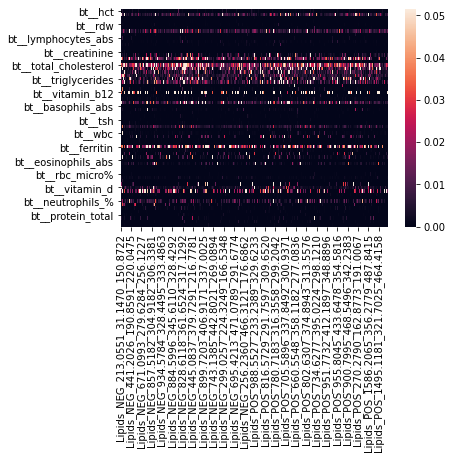

In [36]:
import seaborn as sns
# mean_shap_calc
# sns.heatmap(mean_shap_calc.T.nlargest(10, 'bt__uric_acid'))
sns.heatmap(mean_shap_calc, robust=True)


In [8]:
import ShapCalc
ShapCalc.shapDF(shap_values, x)
# shap_values.shape

,gender,age
10K_9018750047,0.014629,0.129253
10K_6869576609,0.002346,-0.189048
10K_9583942403,-0.017982,0.001382
10K_8439538363,-0.004896,0.065282
10K_1078501494,0.029835,0.045822
...,...,...
10K_7071846809,-0.033282,-0.078527
10K_7823323894,-0.014179,-0.090262
10K_7258464292,-0.013301,0.110366
10K_7396455088,-0.005298,0.087061


In [5]:
import os

import pickle
import numpy as np
import pandas as pd
import shap


def load_pickle(path: os.path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    assert isinstance(data, object)
    return data


def shapExplainer(model):
    explainer = shap.TreeExplainer(model)
    return explainer


def shapValues(explainer, x):
    shap_values = explainer.shap_values(x)
    return shap_values


def shapDF(shap_values, x):
    df = pd.DataFrame(shap_values)
    df.columns = x.columns.to_list()
    df.index = x.index.to_list()
    return df


def column_abs_mean(df: pd.DataFrame):
    mean_df = df.abs().mean(axis='index')
    return mean_df



path = '/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_age_gender/Results_AG_pickle'
data = load_pickle(path)
mean_shap_values = pd.DataFrame()
for i in range(len(data)):
    model = data.model[i]
    x = data.x_test[i]
    y = data.y_test[i]
    explainer = shapExplainer(model)
    shap_values = shapValues(explainer, x)
    shap_df = shapDF(shap_values, x)
    shap_df = column_abs_mean(shap_df)
    shap_df.name = y[i].columns[0]
    shap_df = pd.DataFrame(shap_df).T

    mean_shap_values = mean_shap_values.append(shap_df)

mean_shap_values

Traceback (most recent call last):
  File "/home/galavner/Desktop/pycharm-2021.3.3/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_xml.py", line 266, in frame_vars_to_xml
    xml += var_to_xml(v, str(k), evaluate_full_value=eval_full_val)
  File "/home/galavner/Desktop/pycharm-2021.3.3/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_xml.py", line 346, in var_to_xml
    if is_pandas_container(type_qualifier, typeName, v):
  File "/home/galavner/Desktop/pycharm-2021.3.3/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_utils.py", line 574, in is_pandas_container
    return var_type in ("DataFrame", "Series") and type_qualifier.startswith("pandas") and hasattr(var, "shape")
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/pandas/core/generic.py", line 5463, in __getattr__
    if self._info_axis._can_hold_identifiers_and_holds_name(name):
  File "/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/pandas/core/generic.py", line 5463, in __getattr__
    if self._info_axis

KeyError: 0

In [566]:
x=results_ag.x_test[0]
y=results_ag.y_test[0]
model=results_ag.model[0]
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(x)

In [575]:
dfshap=pd.DataFrame(shap_values)
dfshap.columns = x.columns.to_list()
dfshap.index=x.index.to_list()
dfshap=dfshap.abs().mean(axis='index')
dfshap.name=y.columns[0]
dfshap

gender    0.015146
age       0.076747
Name: bt__crp_wide_range, dtype: float64

In [587]:
import ShapCalc
import pandas as pd
# ShapCalc.shapDF(shap_values, x)
pd.DataFrame(shap_values)

ValueError: Must pass 2-d input. shape=(1, 371, 2)

In [577]:
pd.DataFrame(dfshap).T

,gender,age
bt__crp_wide_range,0.015146,0.076747


<AxesSubplot:>

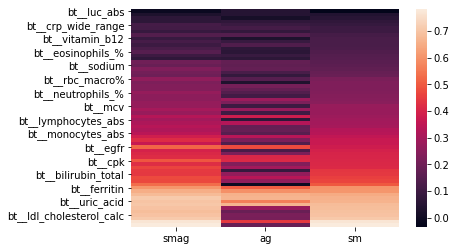

In [83]:
smag_sr = metrics_smag.pearson_r
smag_sr.name = 'smag'
ag_sr = metrics_ag.pearson_r
ag_sr.name = 'ag'
sm_sr = metrics_sm.pearson_r
sm_sr.name = 'sm'
pearson_r_df = pd.concat([smag_sr, ag_sr, sm_sr], axis=1)
pearson_r_df=pearson_r_df.sort_values(by=['sm'])
sns.heatmap(pearson_r_df)

In [65]:
from LabData.DataLoaders.GutMBLoader import GutMBLoader

mb = GutMBLoader().get_data(df = 'segal_species', study_ids=[10, 1001], take_log=True, min_col_present_frac=0.2, research_stafe='baseline', groupby_reg='first', min_col_present=500, norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8})


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


species,fBin__100|gBin__474|sBin__695,fBin__100|gBin__477|sBin__698,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__721,fBin__104|gBin__493|sBin__730,fBin__104|gBin__494|sBin__731,fBin__104|gBin__498|sBin__736,fBin__108|gBin__515|sBin__767,fBin__108|gBin__525|sBin__778,fBin__108|gBin__531|sBin__787,...,fBin__86|gBin__420|sBin__610,fBin__86|gBin__422|sBin__613,fBin__86|gBin__422|sBin__614,fBin__86|gBin__422|sBin__616,fBin__86|gBin__423|sBin__618,fBin__86|gBin__423|sBin__620,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__97|gBin__462|sBin__678
SampleName,,,,,,,,,,,,,,,,,,,,,
22001801554251_v2_fullrun,-4.00000,-4.000000,-4.000000,NaN,-2.589611,-4.000000,-4.000000,-2.728900,-4.000000,-2.964880,...,-3.115825,-4.000000,-2.308645,-4.000000,-2.624058,-3.062499,-3.354232,-4.000000,-4.000000,-2.868946
22001801554255_v2_fullrun,-1.83029,-4.000000,-4.000000,-2.872747,-4.000000,-3.803555,-3.784710,-3.526576,-2.712841,-4.000000,...,-3.134384,-3.498935,-2.479783,-4.000000,-4.000000,-3.643672,-4.000000,-4.000000,-3.315908,-4.000000
22001801554256_v2_fullrun,-1.83029,-3.041183,-4.000000,-4.000000,-4.000000,-4.000000,-3.368524,-4.000000,-4.000000,-4.000000,...,-2.667615,-2.368728,-3.025540,-3.092456,-2.362211,-4.000000,-4.000000,-4.000000,-2.939253,-4.000000
22001801554258_v2_fullrun,-4.00000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.393167,-4.000000,-2.464427,-2.759324,-1.759774,NaN,-4.000000,-2.599674,-4.000000,-4.000000
22001801554262_v2_fullrun,-4.00000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-3.662779,-4.000000,-4.000000,-4.000000,-4.000000,-3.916065,-4.000000,-4.000000,-4.000000,-2.859949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210680404995_v2_fullrun,-4.00000,-3.918940,-2.416706,-4.000000,-3.778805,-3.224417,-3.633128,-4.000000,-4.000000,-4.000000,...,-1.970701,-4.000000,-2.892369,-3.183126,-2.515473,-3.182223,-2.612329,-2.462670,-4.000000,-3.591366
22210680405012_v2_fullrun,-4.00000,-1.996926,-4.000000,-1.968131,-2.823341,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.393426,-4.000000,-2.068359,-4.000000,-4.000000,-2.842186,-3.190828,-2.627312,-3.115074,-3.695556
22210680405018_v2_fullrun,-4.00000,-4.000000,-4.000000,-2.384369,-3.085521,-4.000000,-2.995085,-1.577968,NaN,-4.000000,...,-3.832493,-2.462211,-1.775488,-4.000000,-2.683364,-3.314295,-4.000000,-4.000000,-4.000000,-3.751356


In [80]:
mb.df.set_index(mb.df_metadata['RegistrationCode'].drop_duplicates())


Index(['fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698',
       'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__721',
       'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731',
       'fBin__104|gBin__498|sBin__736', 'fBin__108|gBin__515|sBin__767',
       'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__531|sBin__787',
       ...
       'fBin__86|gBin__420|sBin__610', 'fBin__86|gBin__422|sBin__613',
       'fBin__86|gBin__422|sBin__614', 'fBin__86|gBin__422|sBin__616',
       'fBin__86|gBin__423|sBin__618', 'fBin__86|gBin__423|sBin__620',
       'fBin__86|gBin__429|sBin__631', 'fBin__88|gBin__434|sBin__637',
       'fBin__94|gBin__448|sBin__654', 'fBin__97|gBin__462|sBin__678'],
      dtype='object', name='species', length=322)

In [93]:
import Loaders

gmbld = Loaders.get_GutMBLoader()
gmbld


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


species,fBin__100|gBin__474|sBin__695,fBin__100|gBin__477|sBin__698,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__721,fBin__104|gBin__493|sBin__730,fBin__104|gBin__494|sBin__731,fBin__104|gBin__498|sBin__736,fBin__108|gBin__515|sBin__767,fBin__108|gBin__525|sBin__778,fBin__108|gBin__531|sBin__787,...,fBin__86|gBin__420|sBin__610,fBin__86|gBin__422|sBin__613,fBin__86|gBin__422|sBin__614,fBin__86|gBin__422|sBin__616,fBin__86|gBin__423|sBin__618,fBin__86|gBin__423|sBin__620,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__97|gBin__462|sBin__678
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_4510122421,-4.00000,-4.000000,-4.000000,NaN,-2.589611,-4.000000,-4.000000,-2.728900,-4.000000,-2.964880,...,-3.115825,-4.000000,-2.308645,-4.000000,-2.624058,-3.062499,-3.354232,-4.000000,-4.000000,-2.868946
10K_9304809174,-1.83029,-4.000000,-4.000000,-2.872747,-4.000000,-3.803555,-3.784710,-3.526576,-2.712841,-4.000000,...,-3.134384,-3.498935,-2.479783,-4.000000,-4.000000,-3.643672,-4.000000,-4.000000,-3.315908,-4.000000
10K_8273374731,-1.83029,-3.041183,-4.000000,-4.000000,-4.000000,-4.000000,-3.368524,-4.000000,-4.000000,-4.000000,...,-2.667615,-2.368728,-3.025540,-3.092456,-2.362211,-4.000000,-4.000000,-4.000000,-2.939253,-4.000000
10K_2302377468,-4.00000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.393167,-4.000000,-2.464427,-2.759324,-1.759774,NaN,-4.000000,-2.599674,-4.000000,-4.000000
10K_4972103700,-4.00000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-3.662779,-4.000000,-4.000000,-4.000000,-4.000000,-3.916065,-4.000000,-4.000000,-4.000000,-2.859949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_3326161945,-4.00000,-3.918940,-2.416706,-4.000000,-3.778805,-3.224417,-3.633128,-4.000000,-4.000000,-4.000000,...,-1.970701,-4.000000,-2.892369,-3.183126,-2.515473,-3.182223,-2.612329,-2.462670,-4.000000,-3.591366
10K_2838295615,-4.00000,-1.996926,-4.000000,-1.968131,-2.823341,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.393426,-4.000000,-2.068359,-4.000000,-4.000000,-2.842186,-3.190828,-2.627312,-3.115074,-3.695556
10K_9587330622,-4.00000,-4.000000,-4.000000,-2.384369,-3.085521,-4.000000,-2.995085,-1.577968,NaN,-4.000000,...,-3.832493,-2.462211,-1.775488,-4.000000,-2.683364,-3.314295,-4.000000,-4.000000,-4.000000,-3.751356


In [94]:
mb.df_metadata

,RegistrationCode,GenesetMapCount,HGMappedRC,MPAMapCount,Nextera,PE,PostHGFRC,PostQCRC,PostTrimRC,RawRC,...,Notes,gender,StudyTypeID2,us_state,age,yob,StudyTypeID3,country,tz,city
SampleName,,,,,,,,,,,,,,,,,,,,,
22001801554251_v2_fullrun,10K_4510122421,NaN,14346.0,NaN,None,False,6076571.0,6090917.0,NaN,7973821.0,...,None,0.0,NaN,None,50.0,1971.0,NaN,IL,Asia/Jerusalem,None
22001801554255_v2_fullrun,10K_9304809174,NaN,8858.0,NaN,None,False,7892242.0,7901100.0,NaN,11360209.0,...,None,1.0,NaN,None,61.0,1960.0,NaN,IL,Asia/Jerusalem,None
22001801554256_v2_fullrun,10K_8273374731,NaN,6863.0,NaN,None,False,7457417.0,7464280.0,NaN,11215176.0,...,None,1.0,NaN,None,46.0,1975.0,NaN,IL,Asia/Jerusalem,None
22001801554258_v2_fullrun,10K_2302377468,NaN,509.0,NaN,None,False,9091260.0,9091769.0,NaN,12426954.0,...,None,0.0,NaN,None,51.0,1970.0,NaN,IL,Asia/Jerusalem,None
22001801554262_v2_fullrun,10K_4972103700,NaN,7474.0,NaN,None,False,7237093.0,7244567.0,NaN,11037789.0,...,None,0.0,NaN,None,52.0,1969.0,NaN,IL,Asia/Jerusalem,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210680404995_v2_fullrun,10K_3326161945,NaN,20584.0,NaN,None,False,8724580.0,8745759.0,NaN,9759558.0,...,None,0.0,NaN,None,54.0,1968.0,NaN,IL,Asia/Jerusalem,None
22210680405012_v2_fullrun,10K_2838295615,NaN,7272.0,NaN,None,False,8575438.0,8588555.0,NaN,9514219.0,...,None,0.0,NaN,None,57.0,1965.0,NaN,IL,Asia/Jerusalem,None
22210680405018_v2_fullrun,10K_9587330622,NaN,19869.0,NaN,None,False,7738094.0,7758667.0,NaN,8415145.0,...,None,0.0,NaN,None,65.0,1957.0,NaN,IL,Asia/Jerusalem,None


In [89]:
smbld_df = Loaders.fix_indices(smbld, True)
gmbld.reindex(smbld_df.index).dropna(how='all')

species,fBin__100|gBin__474|sBin__695,fBin__100|gBin__477|sBin__698,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__721,fBin__104|gBin__493|sBin__730,fBin__104|gBin__494|sBin__731,fBin__104|gBin__498|sBin__736,fBin__108|gBin__515|sBin__767,fBin__108|gBin__525|sBin__778,fBin__108|gBin__531|sBin__787,...,fBin__86|gBin__420|sBin__610,fBin__86|gBin__422|sBin__613,fBin__86|gBin__422|sBin__614,fBin__86|gBin__422|sBin__616,fBin__86|gBin__423|sBin__618,fBin__86|gBin__423|sBin__620,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__97|gBin__462|sBin__678
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9018750047,-3.292001,-3.146862,-3.187177,-2.187233,-3.044968,-4.000000,-3.082557,-4.000000,-4.000000,-4.000000,...,-2.124458,-3.434854,-2.527492,-2.806240,-3.100220,-2.440412,-3.552277,-4.000000,-3.353470,-3.561686
10K_2302377468,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.393167,-4.000000,-2.464427,-2.759324,-1.759774,NaN,-4.000000,-2.599674,-4.000000,-4.000000
10K_1156163709,-4.000000,-1.890599,-4.000000,-2.571896,-3.372777,NaN,-3.779107,-3.273819,-4.000000,-4.000000,...,-1.982835,-2.515774,-2.187401,-2.942204,-2.560633,-2.251126,-3.014874,-4.000000,NaN,-3.849481
10K_8000222851,-4.000000,-1.844652,-4.000000,-2.482512,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-1.765279,...,-2.122629,-2.348551,-4.000000,-4.000000,-4.000000,-2.832327,-4.000000,NaN,-4.000000,-4.000000
10K_7498156799,-4.000000,-2.875243,-4.000000,-3.795303,-3.027098,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-2.904912,-3.845643,-1.855262,-4.000000,-4.000000,-2.232176,-4.000000,-4.000000,-4.000000,-3.960247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_3820358393,-4.000000,-4.000000,-4.000000,-2.341124,-2.915573,-4.000000,-4.000000,-1.992699,-4.000000,-4.000000,...,-2.758397,-3.484357,-2.093722,-4.000000,-1.938401,-3.288048,-2.796496,NaN,-4.000000,-2.903943
10K_8335120058,-4.000000,-2.525128,-4.000000,-1.756282,-3.598679,-3.465388,-3.473739,-3.332197,-4.000000,-1.805097,...,-1.954364,-3.808774,-1.930799,-2.879208,-2.414875,-2.940043,-4.000000,-4.000000,-4.000000,-3.647323
10K_4091775581,-4.000000,-4.000000,-4.000000,-2.020008,-4.000000,-3.104280,-4.000000,-2.317526,-2.992091,-2.986884,...,-2.208033,-2.348551,-3.859549,-4.000000,-2.459944,-3.001679,-2.679789,NaN,-3.866814,-2.471270


In [91]:
smbld_df.reindex(gmbld.reindex(smbld_df.index).dropna(how='all').index)

,Lipids_NEG_213.0551_31.1470_150.8722,Lipids_NEG_217.0025_30.9563_142.6050,Lipids_NEG_232.9752_30.7462_142.0463,Lipids_NEG_194.9054_31.5023_122.7051,Lipids_NEG_259.0096_32.6407_265.7862,Lipids_NEG_255.8219_33.2194_130.6976,Lipids_NEG_162.8391_33.8351_108.4717,Lipids_NEG_373.0100_35.5757_173.8172,Lipids_NEG_174.0986_36.9306_140.8142,Lipids_NEG_172.9911_36.9286_129.8889,...,Lipids_POS_1757.5505_448.5294_591.4928,Lipids_POS_1766.5369_461.3906_591.9430,Lipids_POS_1770.5687_478.4384_593.5832,Lipids_POS_1713.5823_478.9679_586.4714,Lipids_POS_1792.5547_460.4830_595.1900,Lipids_POS_1244.3605_492.4100_354.9595,Lipids_POS_1474.1123_372.3885_474.0814,Lipids_POS_1797.5836_455.3832_600.0766,Lipids_POS_1817.6462_477.9538_610.7669,Lipids_POS_356.3520_202.2460_210.9004
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9018750047,-1.684810,-0.485782,1.490305,-3.085552,-0.649288,0.211747,0.923378,-2.995648,-1.813691,0.066048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10K_2302377468,-2.171692,-0.378804,3.252638,-2.410482,-0.764603,0.467780,1.375945,-3.729037,-1.547291,-1.735283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10K_1156163709,-1.936906,-0.729343,1.443055,-2.383031,1.495341,0.210996,0.951642,-1.187971,0.686279,-0.737882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10K_8000222851,-1.123428,-1.494893,1.377108,-2.626925,-0.496530,0.470069,0.938949,-1.626023,-1.254751,0.982474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10K_7498156799,-1.805166,-0.163441,1.300626,-2.476073,-1.958744,0.431923,1.197551,-0.554004,-1.061795,1.488520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_3820358393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.783503,NaN,NaN,NaN,-1.060575
10K_8335120058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.406118,NaN,NaN,NaN,-1.193360
10K_4091775581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.424081,NaN,NaN,NaN,-0.568062


In [5]:
import pickle

with open('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_SM_age_gender/Results_GMB_pickle', 'rb') as f:
    results_gmb = pickle.load(f)
results_gmb

,x_train,x_test,y_train,y_test,y_pred,model,results_dict
fBin__100|gBin__474|sBin__695,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__100|gBin__474|sBin__69...,fBin__100|gBin__474|sBin__69...,fBin__100|gBin__474|sBin__69...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.00700160295...
fBin__100|gBin__477|sBin__698,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__100|gBin__477|sBin__69...,fBin__100|gBin__477|sBin__69...,fBin__100|gBin__477|sBin__69...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': -0.0026878353...
fBin__100|gBin__483|sBin__709,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__100|gBin__483|sBin__70...,fBin__100|gBin__483|sBin__70...,fBin__100|gBin__483|sBin__70...,"LGBMRegressor(bagging_fraction=0.8, bagging_fr...",{'Coefficient_of_determination': 0.01723822982...
fBin__102|gBin__490|sBin__721,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__102|gBin__490|sBin__72...,fBin__102|gBin__490|sBin__72...,fBin__102|gBin__490|sBin__72...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.03748222897...
fBin__104|gBin__493|sBin__730,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__104|gBin__493|sBin__73...,fBin__104|gBin__493|sBin__73...,fBin__104|gBin__493|sBin__73...,"LGBMRegressor(bagging_fraction=0.8, bagging_fr...",{'Coefficient_of_determination': 0.05723963202...
...,...,...,...,...,...,...,...
fBin__86|gBin__423|sBin__620,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__86|gBin__423|sBin__620...,fBin__86|gBin__423|sBin__620...,fBin__86|gBin__423|sBin__620...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': 0.01131322504...
fBin__86|gBin__429|sBin__631,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__86|gBin__429|sBin__631...,fBin__86|gBin__429|sBin__631...,fBin__86|gBin__429|sBin__631...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.00537431286...
fBin__88|gBin__434|sBin__637,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__88|gBin__434|sBin__637...,fBin__88|gBin__434|sBin__637...,fBin__88|gBin__434|sBin__637...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.01706268927...
fBin__94|gBin__448|sBin__654,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,fBin__94|gBin__448|sBin__654...,fBin__94|gBin__448|sBin__654...,fBin__94|gBin__448|sBin__654...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': 0.08857905201...


In [7]:
import pandas as pd
metrics_gmb = results_gmb.results_dict
metrics_gmb = pd.json_normalize(metrics_gmb)
metrics_gmb.index = results_gmb.index
metrics_gmb

,Coefficient_of_determination,explained_variance_score,pearson_r,pearson_p_value,spearman_r,spearman_p_value
fBin__100|gBin__474|sBin__695,0.007002,0.007715,0.115830,2.140744e-04,0.121694,1.000084e-04
fBin__100|gBin__477|sBin__698,-0.002688,-0.002662,0.072470,2.013623e-02,0.058696,5.993718e-02
fBin__100|gBin__483|sBin__709,0.017238,0.019511,0.150918,1.256350e-06,0.161437,2.117701e-07
fBin__102|gBin__490|sBin__721,0.037482,0.037638,0.195466,3.311037e-10,0.187118,1.853377e-09
fBin__104|gBin__493|sBin__730,0.057240,0.057326,0.239583,1.119029e-14,0.245924,2.090999e-15
...,...,...,...,...,...,...
fBin__86|gBin__423|sBin__620,0.011313,0.011327,0.124253,7.333745e-05,0.121760,1.023285e-04
fBin__86|gBin__429|sBin__631,0.005374,0.007640,0.096972,2.044127e-03,0.097963,1.836869e-03
fBin__88|gBin__434|sBin__637,0.017063,0.017614,0.133574,2.529666e-05,0.130225,4.032307e-05
fBin__94|gBin__448|sBin__654,0.088579,0.088720,0.300851,5.434273e-23,0.285994,7.699460e-21


(array([ 5., 22., 50., 78., 73., 38., 27., 14., 11.,  4.]),
 array([-0.05539655, -0.00231839,  0.05075977,  0.10383793,  0.15691609,
         0.20999425,  0.26307241,  0.31615057,  0.36922873,  0.42230689,
         0.47538505]),
 <BarContainer object of 10 artists>)

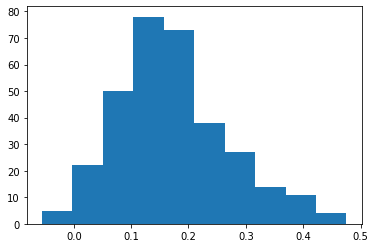

In [10]:
import matplotlib.pyplot as plt
plt.hist(metrics_gmb.pearson_r)

In [278]:
metrics_gmb.idxmax()

Coefficient_of_determination    fBin__541|gBin__2135|sBin__3290
explained_variance_score        fBin__541|gBin__2135|sBin__3290
pearson_r                       fBin__541|gBin__2066|sBin__3167
pearson_p_value                    fBin__73|gBin__346|sBin__494
spearman_r                      fBin__541|gBin__2135|sBin__3290
spearman_p_value                fBin__598|gBin__2265|sBin__3456
dtype: object

In [26]:
from scipy.stats import pearsonr
print(pearsonr(pearson_r_df.ag, pearson_r_df.smag))
print(pearsonr(pearson_r_df.ag, pearson_r_df.sm))
print(pearsonr(pearson_r_df.smag, pearson_r_df.sm))

(0.7103998811158778, 4.873582398466684e-11)
(0.6659128568286897, 1.920003935493411e-09)
(0.9902631080123343, 8.229334324076996e-55)


In [40]:
import pandas as pd
phys_act = pd.read_csv('/net/mraid08/export/genie/LabData/Analyses/galavner/DB/physical_activity.csv')
phys_act.index = phys_act.participant_id
phys_act.drop(columns=['participant_id', phys_act.columns[0]])

,HP_MET_sum_mean,HP_MET_sum_std,HP_step_sum_mean,HP_step_sum_std,HP,HP_sum_std,MET_max_mean,MET_mean,MET_min_mean,MET_std,...,min_high_sum_mean,min_high_sum_std,min_med_sum_mean,min_med_sum_std,move_min_mean,move_min_std,steps_day_mean,steps_day_std,step_min_mean_mean,step_min_mean_std
participant_id,,,,,,,,,,,,,,,,,,,,,
1007330152,6.418919,5.244715,1.283784,1.854430,6.527027,5.364069,3.656887,1.911742,0.776827,1.290179,...,0.007207,0.031342,23.344144,17.634369,17.563964,18.313165,2890.810811,1896.807005,26.748111,15.903600
1012027362,8.764286,6.797810,1.435714,2.022217,8.821429,6.877414,3.816695,2.556948,1.008125,1.330499,...,0.059405,0.415378,30.935476,25.175571,30.070476,26.211859,3052.614286,2399.788626,42.850821,17.483646
1012400211,8.113208,4.758233,1.415094,1.875284,8.169811,4.810789,3.769929,2.506063,0.965145,1.314065,...,0.007862,0.038063,20.135535,15.956599,18.131761,16.338748,1965.150943,1639.989662,37.057825,14.708767
1018146705,1.476190,1.860619,0.142857,0.358569,1.476190,1.860619,2.479963,1.347725,0.910586,0.687588,...,0.000000,0.000000,5.638889,8.474502,2.191270,6.148332,1084.238095,879.098965,10.179570,8.654252
1020576262,7.428571,3.258688,0.571429,0.786796,7.428571,3.258688,3.692647,2.123241,0.961868,1.347571,...,0.000000,0.000000,35.635714,20.653036,14.026190,9.772585,3107.285714,762.434634,20.009754,7.594312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972023164,14.125000,6.522953,2.416667,1.639636,14.416667,6.580053,4.026033,2.320757,0.838275,1.424085,...,0.131250,0.448463,29.561111,14.249309,26.590278,15.424060,3857.000000,1363.403924,36.529167,9.378504
9973999327,8.088889,5.727216,0.677778,0.921988,8.111111,5.750319,3.780300,2.262011,0.909768,1.381927,...,0.001296,0.007590,25.447593,19.536127,19.367222,18.861991,2514.433333,1765.929008,30.403674,13.919005
9975645275,22.769231,14.492261,3.076923,3.303068,22.923077,14.522750,4.114014,2.398613,0.972234,1.357012,...,0.026923,0.067884,40.187179,24.995142,36.914103,22.575190,5127.461538,2345.650323,38.695196,8.089773


In [81]:
# sm_df = sm.df.set_index(sm.df_metadata.RegistrationCode.drop_duplicates())
sm.df_metadata.RegistrationCode.str.lstrip('10K_')
sm.df.set_index(pd.to_numeric(sm.df_metadata.RegistrationCode.str[4:]).drop_duplicates())
# type(phys_act.index[5])


,Lipids_NEG_213.0551_31.1470_150.8722,Lipids_NEG_217.0025_30.9563_142.6050,Lipids_NEG_232.9752_30.7462_142.0463,Lipids_NEG_194.9054_31.5023_122.7051,Lipids_NEG_259.0096_32.6407_265.7862,Lipids_NEG_255.8219_33.2194_130.6976,Lipids_NEG_162.8391_33.8351_108.4717,Lipids_NEG_373.0100_35.5757_173.8172,Lipids_NEG_174.0986_36.9306_140.8142,Lipids_NEG_172.9911_36.9286_129.8889,...,Lipids_POS_1757.5505_448.5294_591.4928,Lipids_POS_1766.5369_461.3906_591.9430,Lipids_POS_1770.5687_478.4384_593.5832,Lipids_POS_1713.5823_478.9679_586.4714,Lipids_POS_1792.5547_460.4830_595.1900,Lipids_POS_1244.3605_492.4100_354.9595,Lipids_POS_1474.1123_372.3885_474.0814,Lipids_POS_1797.5836_455.3832_600.0766,Lipids_POS_1817.6462_477.9538_610.7669,Lipids_POS_356.3520_202.2460_210.9004
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
9018750047,-1.684810,-0.485782,1.490305,-3.085552,-0.649288,0.211747,0.923378,-2.995648,-1.813691,0.066048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302377468,-2.171692,-0.378804,3.252638,-2.410482,-0.764603,0.467780,1.375945,-3.729037,-1.547291,-1.735283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156163709,-1.936906,-0.729343,1.443055,-2.383031,1.495341,0.210996,0.951642,-1.187971,0.686279,-0.737882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8000222851,-1.123428,-1.494893,1.377108,-2.626925,-0.496530,0.470069,0.938949,-1.626023,-1.254751,0.982474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498156799,-1.805166,-0.163441,1.300626,-2.476073,-1.958744,0.431923,1.197551,-0.554004,-1.061795,1.488520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820358393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.783503,NaN,NaN,NaN,-1.060575
8335120058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.406118,NaN,NaN,NaN,-1.193360
4091775581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.424081,NaN,NaN,NaN,-0.568062


In [82]:
type(phys_act)

pandas.core.frame.DataFrame

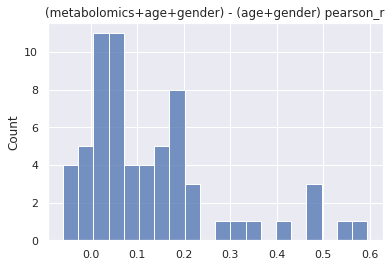

In [271]:
sns.histplot(pearson_r_df.smag-pearson_r_df.ag, bins = 20)
plt.title('(metabolomics+age+gender) - (age+gender) pearson_r')
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/pearson_r_differences_smag-ag.pdf')
# plt.xlabel()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


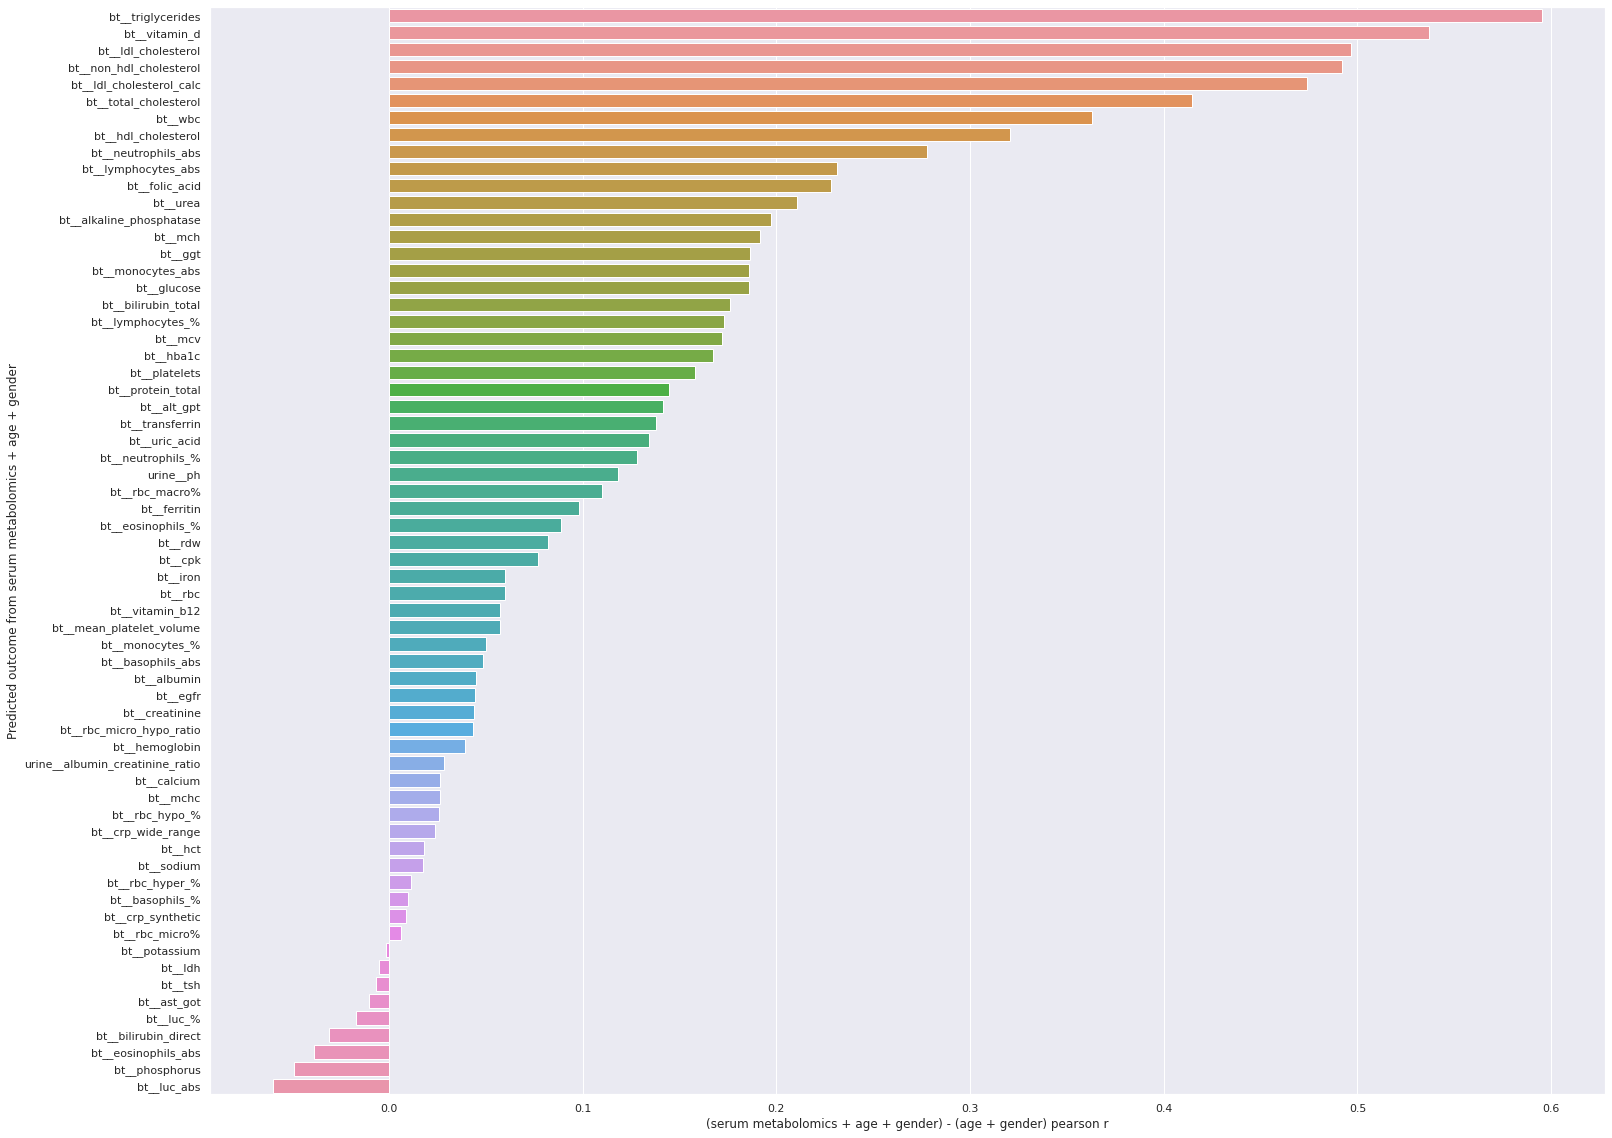

In [352]:
pearson_r_diff = pearson_r_df.smag-pearson_r_df.ag
pearson_r_diff = pearson_r_diff.sort_values(ascending=False)
pearson_r_diff
plt.rcParams['figure.figsize']=[25,20]
sns.barplot(pearson_r_diff.values, pearson_r_diff.index)
plt.ylabel('Predicted outcome from serum metabolomics + age + gender')
plt.xlabel('(serum metabolomics + age + gender) - (age + gender) pearson r')
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/barplot_pearson_r_differences_smag-ag.pdf')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='smag', ylabel='ag'>

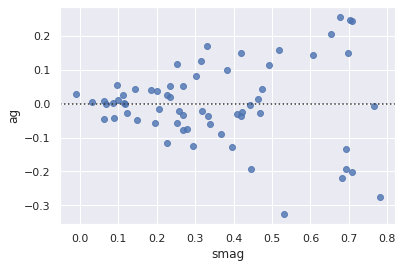

In [250]:
sns.residplot(pearson_r_df.smag,pearson_r_df.ag)

In [117]:
import pickle

with open('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/SM_to_Physical_Activity/Results_SM_to_PA_pickle', 'rb') as f:
    results_phac = pickle.load(f)

,x_train,x_test,y_train,y_test,y_pred,model,results_dict
HP_MET_sum_mean,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,HP_MET_sum_mean participant_id...,HP_MET_sum_mean participant_id...,HP_MET_sum_mean participant_id...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.06218164139...
HP_MET_sum_std,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,HP_MET_sum_std participant_id ...,HP_MET_sum_std participant_id ...,HP_MET_sum_std participant_id ...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.00697521680...
HP_step_sum_mean,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,HP_step_sum_mean participant_i...,HP_step_sum_mean participant_i...,HP_step_sum_mean participant_i...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.00875207435...
HP_step_sum_std,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,HP_step_sum_std participant_id...,HP_step_sum_std participant_id...,HP_step_sum_std participant_id...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.00013612673...
HP,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,HP participant_id ...,HP participant_id ...,HP participant_id ...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.05607563448...
HP_sum_std,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,HP_sum_std participant_id ...,HP_sum_std participant_id ...,HP_sum_std participant_id ...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.00927783098...
MET_max_mean,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,MET_max_mean participant_id ...,MET_max_mean participant_id ...,MET_max_mean participant_id ...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.02192978242...
MET_mean,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,MET_mean participant_id ...,MET_mean participant_id ...,MET_mean participant_id ...,"LGBMRegressor(bagging_fraction=0.8, bagging_fr...",{'Coefficient_of_determination': 0.01815224003...
MET_min_mean,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,MET_min_mean participant_id ...,MET_min_mean participant_id ...,MET_min_mean participant_id ...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': -0.0208371664...
MET_std,Lipids_NEG_213.0551_31.1470_15...,Lipids_NEG_213.0551_31.1470_15...,MET_std participant_id ...,MET_std participant_id ...,MET_std participant_id ...,"LGBMRegressor(bagging_fraction=0.8, bagging_fr...",{'Coefficient_of_determination': 0.00120549316...


In [122]:
metrics_phag = pd.json_normalize(results_phac.results_dict)
metrics_phag.index = results_phac.index

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


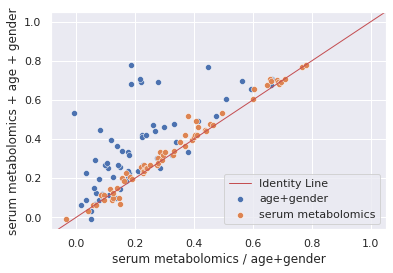

In [272]:
%matplotlib inline
sns.scatterplot(pearson_r_df.ag, pearson_r_df.smag, label='age+gender')
# sns.regplot(pearson_r_df.ag, pearson_r_df.smag)
# plt.xlim(plt.get_ylim)
sns.scatterplot(pearson_r_df.sm, pearson_r_df.smag, label='serum metabolomics')
plt.axline((0, 0), (1, 1), linewidth=1, color='r', label='Identity Line')
plt.xlabel('serum metabolomics / age+gender')
plt.ylabel('serum metabolomics + age + gender')
plt.legend()
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/pearson_r_scatter_plot.pdf')

<AxesSubplot:xlabel='pearson_r', ylabel='Count'>

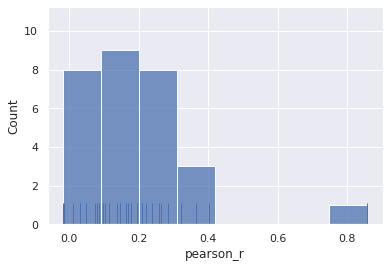

In [140]:
# sns.set_theme()
sns.histplot(metrics_phag.pearson_r)
sns.rugplot(metrics_phag.pearson_r,height=.1)

In [141]:
metrics_phag.sort_values(by='pearson_r')

,Coefficient_of_determination,explained_variance_score,pearson_r,pearson_p_value,spearman_r,spearman_p_value
min_high_sum_std,-0.029203,-0.015233,-0.017377,7.702150e-01,0.055476,3.507481e-01
MET_min_mean,-0.020837,-0.019088,-0.015016,8.007356e-01,0.205758,4.726390e-04
steps_day_std,-0.012815,-0.004180,0.011291,8.494816e-01,0.001844,9.752692e-01
min_high_sum_mean,-0.007852,0.000522,0.032545,5.842789e-01,0.009871,8.682219e-01
MET_std,0.001205,0.001644,0.048459,4.150952e-01,0.121099,4.105928e-02
HP_step_sum_std,0.000136,0.005169,0.074163,2.119444e-01,0.033737,5.705754e-01
move_min_std,-0.005629,0.005731,0.080902,1.731936e-01,0.103340,8.158238e-02
step_min_mean_mean,0.006610,0.006726,0.087538,1.404414e-01,0.102454,8.424688e-02
min_med_sum_std,-0.001195,0.007345,0.096692,1.033145e-01,0.114962,5.254053e-02
datetime_count,-0.002033,0.010512,0.104534,7.810057e-02,0.157572,7.696478e-03


In [230]:
import numpy as np
import pandas as pd
def get_n_important_features(mean_shap_calc: pd.DataFrame, n: int = 5):
    importance = pd.DataFrame()
    shap_t = mean_shap_calc.T
    most_imprtant={}
    for col in shap_t.columns:
        most_imprtant[col] = shap_t.nlargest(n, col).index.to_list()
        ser = pd.Series(shap_t.loc[shap_t.nlargest(5, col).index, col])
        importance = pd.concat([importance, ser], axis='columns')
    return importance.T

def get_most_important_frequency(most_important: dict, freq_threshold: int = 0):
    freq = most_important.count()
    freq = freq[freq > freq_threshold]
    return freq

most_important = get_n_important_features(mean_shap_calc)
# freq=get_most_important_frequency(most_important)
# print(get_most_important_frequency(get_n_important_features(mean_shap_calc)))

<AxesSubplot:>

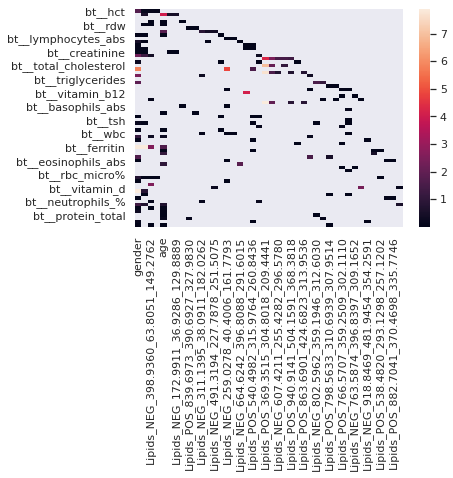

In [251]:
sns.heatmap(most_important[[c for c in list(most_important) if len(most_important[c].unique()) > 2]], robust=True)

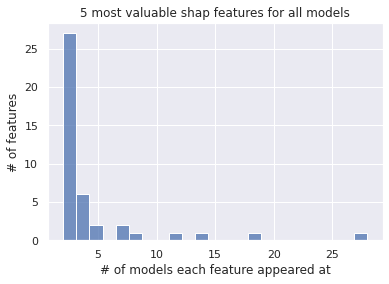

In [270]:
sns.histplot(freq)
plt.title('5 most valuable shap features for all models')#the # of times each feature was an important SHAP feature for all models')
plt.xlabel('# of models each feature appeared at')
plt.ylabel('# of features')
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/smag_feature_importance.pdf')

<AxesSubplot:ylabel='Count'>

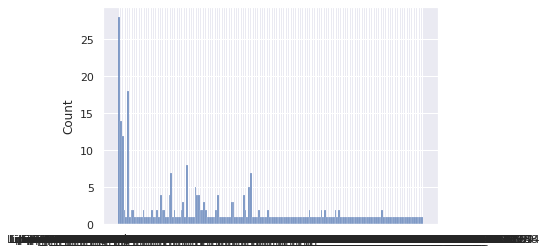

In [202]:
sns.histplot(np.concatenate(list({k: v for k, v in most_important.items() if }.values()[])))

<AxesSubplot:ylabel='Count'>

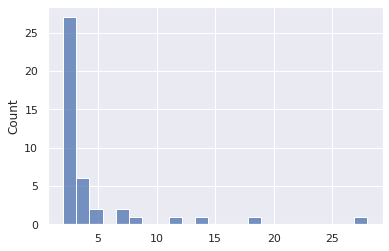

In [262]:
sns.histplot(most_important.count()[most_important.count() > 1],)

In [279]:
shap_vals_gmb = ShapCalc.calc_abs_mean_shap('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/X_SM_age_gender/Results_GMB_pickle')

In [285]:
shap_vals_gmb_important = get_n_important_features(shap_vals_gmb)
shap_freq_gmb = shap_vals_gmb_important.count()[shap_vals_gmb_important.count()>1]

Lipids_NEG_203.0015_37.9252_137.0085      31
Lipids_NEG_231.0328_42.5301_150.0994     134
Lipids_NEG_187.0069_37.7188_137.4008     192
Lipids_POS_776.5579_353.7043_296.3093      2
Lipids_POS_939.5940_286.5102_319.6547      2
                                        ... 
Lipids_NEG_932.8632_501.4787_355.1549      2
Lipids_POS_552.4021_243.2522_254.7229      2
Lipids_NEG_918.8469_481.9454_354.2591      2
Lipids_NEG_582.5087_339.9053_266.2503      2
Lipids_NEG_528.2729_167.4513_229.3328      2
Length: 123, dtype: int64

<AxesSubplot:>

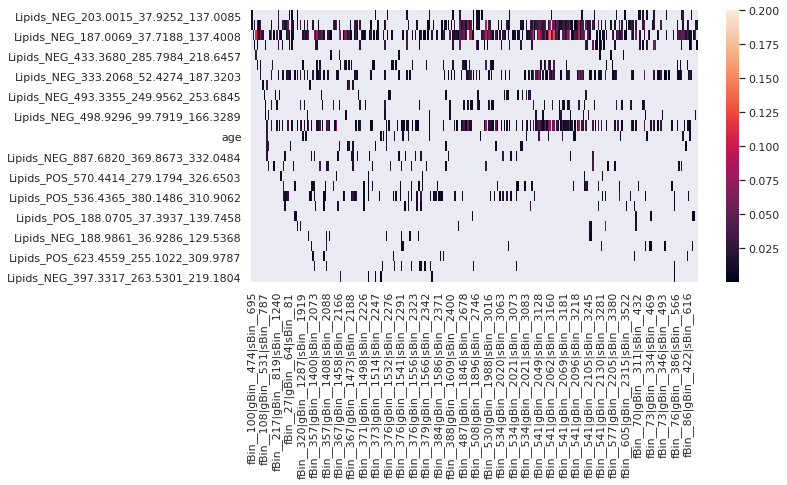

In [300]:
plt.rcParams['figure.figsize']=[10,5]
sns.heatmap(shap_vals_gmb_important.T.loc[shap_freq_gmb[shap_freq_gmb > 5].index.to_list()])

In [296]:
shap_freq_gmb[shap_freq_gmb > 5].index.to_list()

['Lipids_NEG_203.0015_37.9252_137.0085',
 'Lipids_NEG_231.0328_42.5301_150.0994',
 'Lipids_NEG_187.0069_37.7188_137.4008',
 'gender',
 'Lipids_NEG_433.3680_285.7984_218.6457',
 'Lipids_NEG_244.9078_43.7326_136.5785',
 'Lipids_NEG_333.2068_52.4274_187.3203',
 'Lipids_POS_828.6100_346.5201_312.3381',
 'Lipids_NEG_493.3355_249.9562_253.6845',
 'Lipids_NEG_481.2803_61.9849_222.0255',
 'Lipids_NEG_498.9296_99.7919_166.3289',
 'Lipids_NEG_172.9911_36.9286_129.8889',
 'age',
 'Lipids_NEG_435.3835_299.5064_220.4929',
 'Lipids_NEG_887.6820_369.8673_332.0484',
 'Lipids_NEG_391.2848_134.2873_208.3208',
 'Lipids_POS_570.4414_279.1794_326.6503',
 'Lipids_NEG_737.5355_305.2839_293.6982',
 'Lipids_POS_536.4365_380.1486_310.9062',
 'Lipids_POS_568.4268_260.1092_321.3737',
 'Lipids_POS_188.0705_37.3937_139.7458',
 'Lipids_NEG_179.0572_37.5462_132.3456',
 'Lipids_NEG_188.9861_36.9286_129.5368',
 'Lipids_POS_837.6816_373.9327_326.9462',
 'Lipids_POS_623.4559_255.1022_309.9787',
 'Lipids_NEG_635.4522_275.

<AxesSubplot:ylabel='Count'>

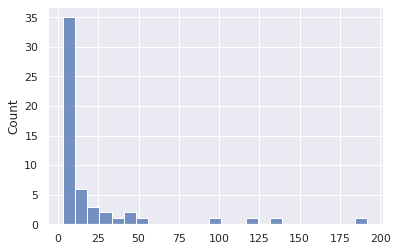

In [287]:
sns.histplot(shap_freq_gmb[shap_freq_gmb > 2])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


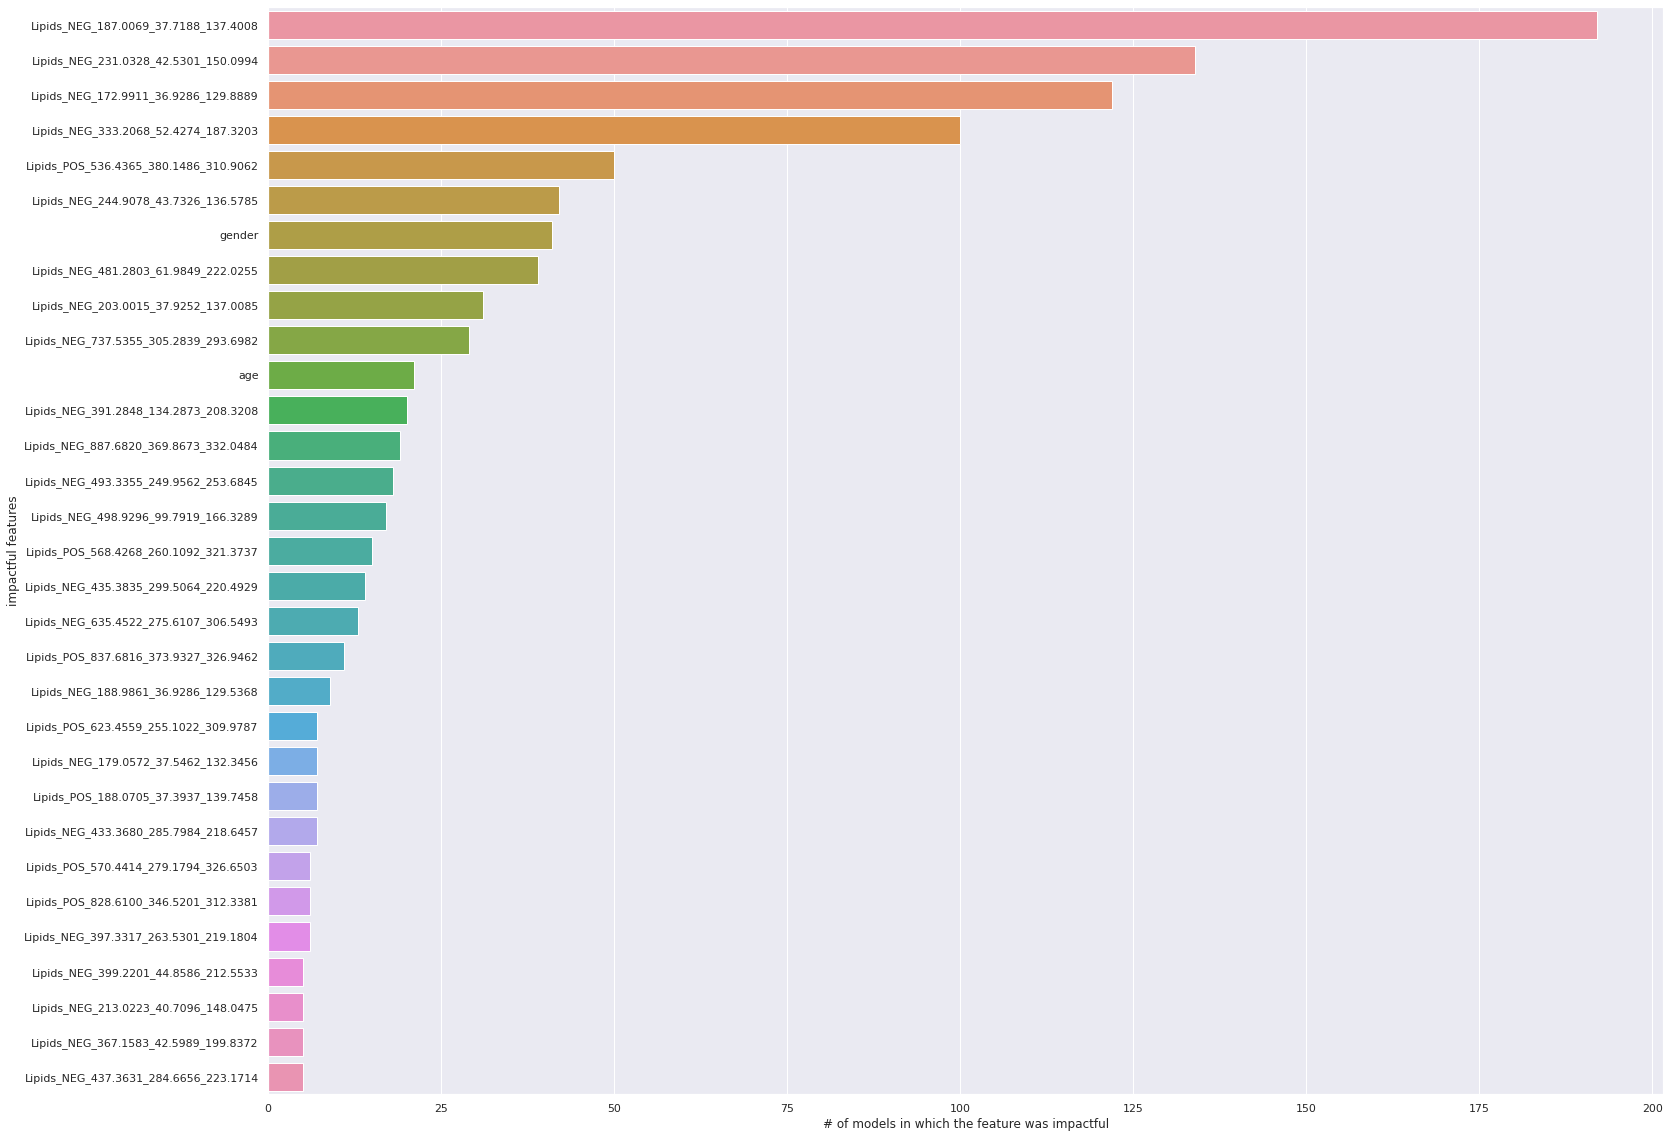

In [357]:
sns.barplot(shap_freq_gmb[shap_freq_gmb > 4].sort_values(ascending=False).values, shap_freq_gmb[shap_freq_gmb > 4].sort_values(ascending=False).index)
plt.ylabel('impactful features')
plt.xlabel('# of models in which the feature was impactful')
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/SerumMetabolomics_age_gender/GutMicroBiome/shap_freq_barplot')

In [332]:
import pickle

with open('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/AG_to_GMB/Results_AG_to_GMB_pickle', 'rb') as f:
    results_gmb_ag = pickle.load(f)

In [337]:
import pandas as pd
metrics_gmb_ag = results_gmb_ag.results_dict
metrics_gmb_ag = pd.json_normalize(metrics_gmb_ag)
metrics_gmb_ag.index = results_gmb_ag.index
# metrics_gmb_ag

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


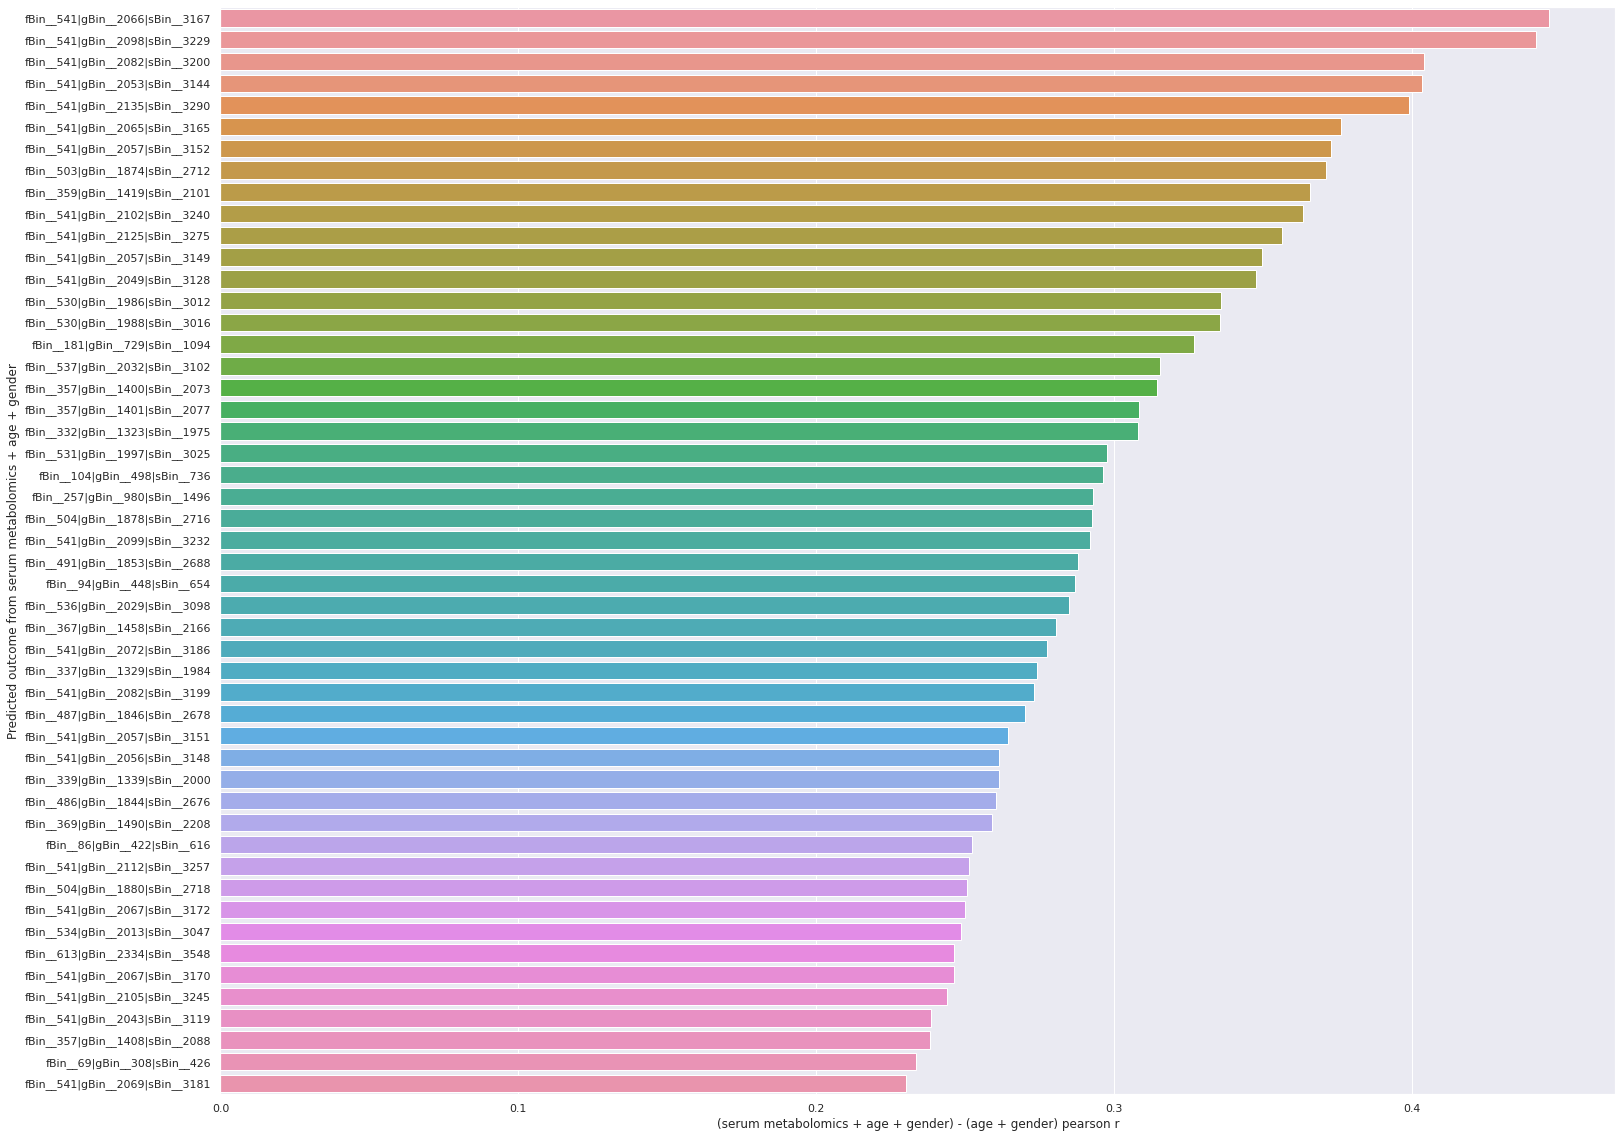

In [359]:
pearson_r_diff_gmb = metrics_gmb.pearson_r - metrics_gmb_ag.pearson_r
pearson_r_diff_gmb = pearson_r_diff_gmb.sort_values(ascending=False)
plt.rcParams['figure.figsize']=[25,20]
num_to_present = 50
sns.barplot(pearson_r_diff_gmb[:num_to_present].values, pearson_r_diff_gmb[:num_to_present].index)
plt.ylabel('Predicted outcome from serum metabolomics + age + gender')
plt.xlabel('(serum metabolomics + age + gender) - (age + gender) pearson r')
# sns.histplot(pearson_r_diff_gmb)
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/SerumMetabolomics_age_gender/GutMicroBiome/barplot_pearson_r_differences_smag-ag.pdf')

In [347]:
from LabData.DataLoaders.DiagnosesLoader import DiagnosesLoader

diagnoses = DiagnosesLoader().get_data()

In [349]:
diagnoses.df_metadata

,,yob,StudyTypeID,country,StudyTypeID3,us_state,tz,city,age,gender,StudyTypeID2
RegistrationCode,Date,,,,,,,,,,
1,2016-02-14 15:29:27,1979.0,50.0,IL,NaN,None,Asia/Jerusalem,None,37.0,1.0,NaN
100128,2018-07-24 10:20:09,1959.0,NaN,None,NaN,None,None,None,59.0,1.0,NaN
100138,2014-05-19 14:59:30,1996.0,NaN,None,NaN,None,None,None,18.0,0.0,NaN
100601,2016-11-08 11:38:51,1984.0,5.0,IL,NaN,None,Asia/Jerusalem,None,32.0,0.0,NaN
101386,2018-07-26 01:21:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
D2_9941,2020-10-19 16:37:33,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2_9947,2020-11-15 15:42:56,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2_9959,2019-06-13 11:05:09,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [364]:
from LabData.DataLoaders.ABILoader import ABILoader
ABILoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,
                                                norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5, 'remove_sigmas': 8}).df

,,l_ankle_index,r_brachial_index,l_ankle_pressure,from_r_thigh_to_r_ankle_distance,r_abi,from_l_thigh_to_l_ankle_duration,r_ankle_index,from_l_thigh_to_l_ankle_distance,from_r_thigh_to_r_ankle_duration,from_r_thigh_to_r_ankle_pwv,l_brachial_pressure,from_l_thigh_to_l_ankle_transit_time,l_abi,l_brachial_index,r_brachial_pressure,from_l_thigh_to_l_ankle_pwv,from_r_thigh_to_r_ankle_transit_time,r_ankle_pressure
RegistrationCode,Date,,,,,,,,,,,,,,,,,,
10K_1000942861,2021-12-13 09:14:42.516409,1.24,1.00,148.0,50.0,1.18,NaN,1.18,53.0,NaN,8.459,119.0,57.4,1.24,1.00,119.0,9.239,59.1,141.0
10K_1001201093,2021-08-26 08:10:37.826755,1.26,0.92,107.0,44.0,1.16,NaN,1.16,44.0,NaN,6.612,85.0,58.8,1.26,1.00,78.0,7.488,66.5,99.0
10K_1002087123,2019-12-04 12:37:03.881590,1.02,0.84,149.0,40.0,1.16,NaN,1.16,42.0,NaN,10.100,146.0,45.2,1.02,1.00,122.0,9.290,39.7,169.0
10K_1003113258,2020-02-09 13:03:05.025196,1.44,1.00,173.0,52.0,1.43,NaN,1.43,53.0,NaN,9.524,115.0,56.3,1.44,0.96,120.0,9.417,54.6,171.0
10K_1007330152,2020-11-16 13:24:57.020948,1.38,1.00,177.0,47.0,1.38,NaN,1.38,49.0,NaN,11.500,120.0,39.3,1.38,0.94,128.0,12.500,40.8,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9995623290,2020-01-30 12:29:14.848001,1.24,0.95,155.0,54.0,1.26,NaN,1.26,56.0,NaN,9.591,125.0,69.0,1.24,1.00,119.0,8.116,56.3,157.0
10K_9995823183,2022-05-18 06:37:45.223404,1.12,0.84,149.0,46.0,0.99,NaN,0.99,45.0,NaN,6.498,133.0,69.5,1.12,1.00,112.0,6.475,70.8,132.0
10K_9996884777,2021-12-02 08:35:57.420587,1.12,0.88,130.0,38.0,1.34,NaN,1.34,40.0,NaN,6.283,116.0,58.4,1.12,1.00,102.0,6.848,60.5,155.0


In [375]:
from LabData.DataLoaders.ECGTextLoader import ECGTextLoader
ECGTextLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,
                                     norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5,
                                                        'remove_sigmas': 8}).df

,,r_r_ms,p_mv_V5,r_ms_aVL,st_mv_aVR,j_mv_V6,s_mv_V1,t_mv_V1,hr_bpm,r_ms_V6,r_ms_II,...,r_mv_V1,r_mv_V4,q_ms_I,t_mv_V2,p_mv_aVF,qrs,q_ms_aVR,q_mv_aVF,r_mv_V6,s_mv_V5
RegistrationCode,Date,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,2021-12-13,1154.0,0.10,34.0,0.00,0.02,-0.35,0.14,52.0,42.0,64.0,...,0.52,1.88,20.0,0.48,0.15,NaN,NaN,NaN,2.36,-0.37
10K_1001201093,2021-08-26,918.0,0.06,NaN,0.04,-0.12,-0.96,0.04,65.0,44.0,44.0,...,0.19,1.17,NaN,0.36,0.13,NaN,NaN,-0.10,0.96,-0.12
10K_1002087123,2019-12-04,822.0,0.10,44.0,-0.02,0.02,-0.80,0.14,73.0,52.0,68.0,...,0.08,0.73,12.0,0.37,0.11,NaN,62.0,NaN,1.04,NaN
10K_1003113258,2020-02-09,1238.0,0.05,56.0,-0.01,-0.03,-1.15,0.11,48.0,50.0,46.0,...,0.18,0.93,NaN,1.12,NaN,NaN,42.0,NaN,1.21,-0.35
10K_1007330152,2020-11-16,602.0,0.11,36.0,0.00,-0.07,-1.13,0.08,100.0,46.0,54.0,...,0.13,1.03,NaN,0.37,0.10,NaN,NaN,-0.09,1.73,-0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9995823183,2022-05-18,1126.0,0.07,52.0,-0.06,0.08,NaN,-0.14,53.0,56.0,50.0,...,0.14,0.59,NaN,0.29,0.09,NaN,52.0,NaN,2.08,-0.22
10K_9996884777,2021-12-02,1160.0,0.12,60.0,-0.02,0.01,-0.98,NaN,52.0,46.0,48.0,...,0.29,0.41,14.0,0.29,0.11,NaN,44.0,NaN,0.66,-0.59
10K_9998418497,2019-11-07,824.0,0.12,38.0,0.00,-0.05,-0.38,-0.07,73.0,48.0,14.0,...,0.12,0.85,NaN,0.07,0.08,NaN,NaN,-0.10,1.16,NaN


In [377]:
from LabData.DataLoaders.UltrasoundLoader import UltrasoundLoader
UltrasoundLoader().get_data(study_ids='10K', groupby_reg='first', min_col_present=500,
                                     norm_dist_capping={'sample_size_frac': 0.95, 'clip_sigmas': 5,
                                                        'remove_sigmas': 8})

In [365]:
import pickle

with open('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/AG_to_ABI/Results_AG_to_ABI_pickle','rb') as f:
    results_abi_ag = pickle.load(f)

In [399]:
metrics_abi_ag = results_abi_ag.results_dict
metrics_abi_ag = pd.json_normalize(metrics_abi_ag)
metrics_abi_ag.index = results_abi_ag.index

<AxesSubplot:xlabel='pearson_r', ylabel='Count'>

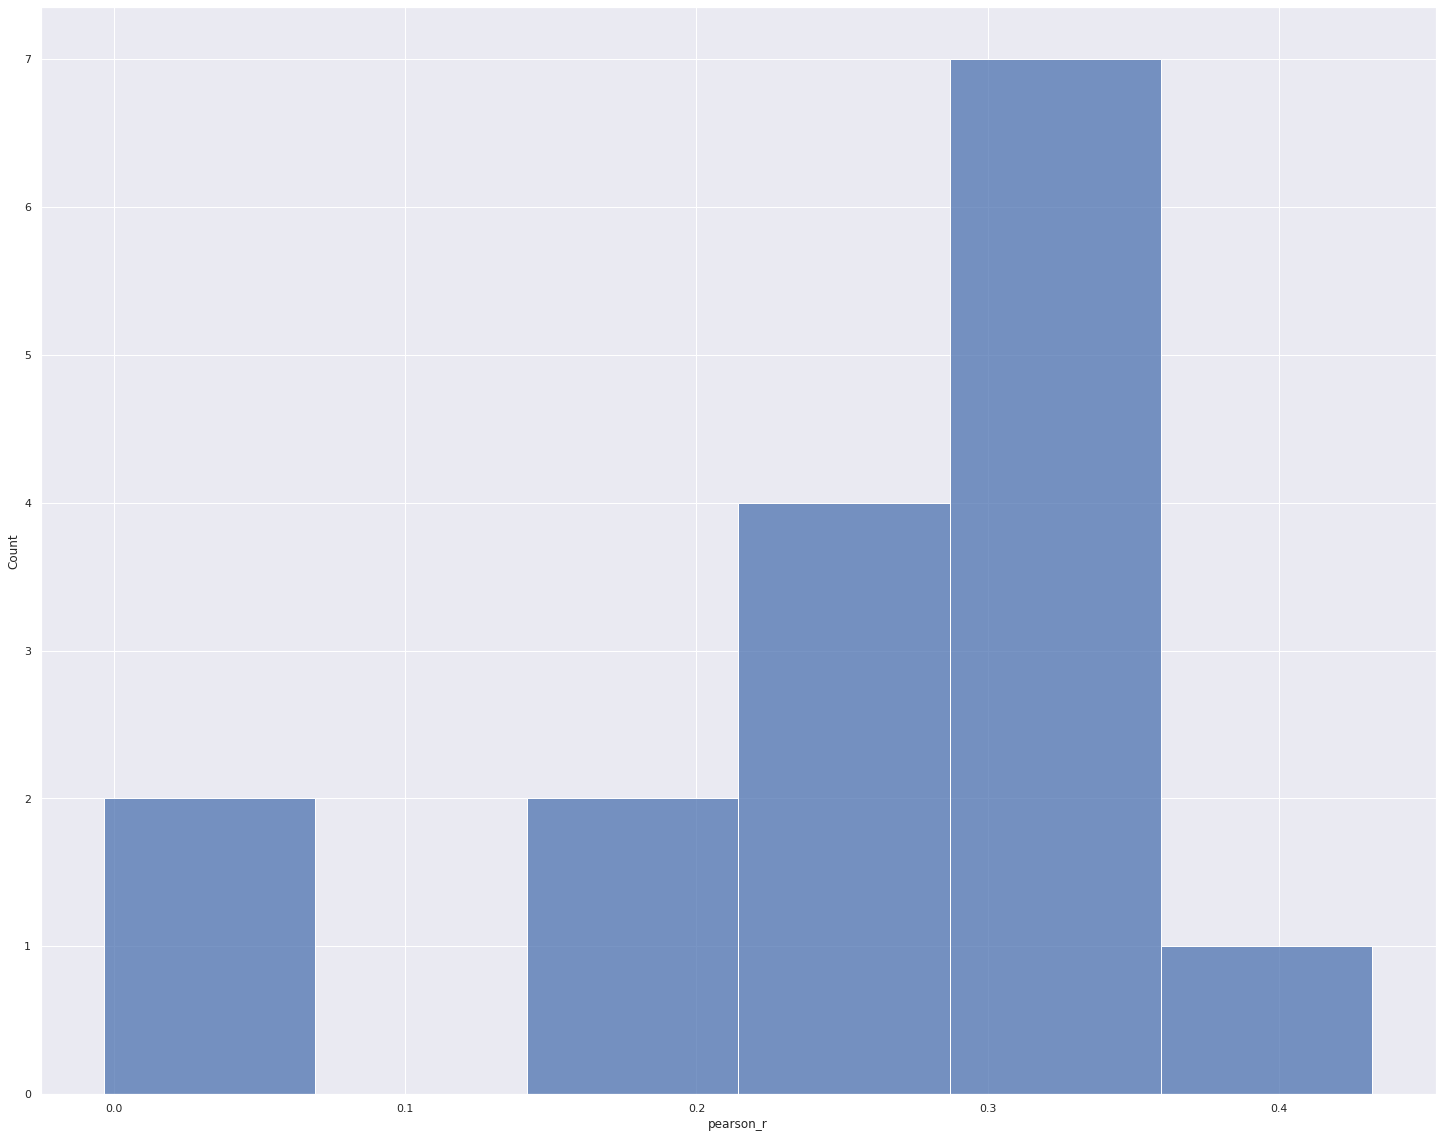

In [373]:
sns.histplot(metrics.pearson_r)

In [383]:
import config_local as cl

results_abi_smag = cl.load_pickle(os.path.join('/',cl.PREDICTIONS_PATH, 'SMAG_to_ABI', 'Results_SMAG_to_ABI_pickle'))

In [403]:
metrics_abi_smag = pd.json_normalize(results_abi_smag.results_dict)
metrics_abi_smag.index = results_abi_smag.index

In [405]:
metrics_abi_smag.pearson_r

r_ankle_index                           0.307174
r_brachial_pressure                     0.437898
r_ankle_pressure                        0.480964
r_brachial_index                        0.143918
from_l_thigh_to_l_ankle_distance        0.551329
from_r_thigh_to_r_ankle_transit_time    0.400821
l_brachial_pressure                     0.463887
from_r_thigh_to_r_ankle_pwv             0.500396
l_ankle_index                           0.277140
r_abi                                   0.294348
from_l_thigh_to_l_ankle_transit_time    0.417946
l_brachial_index                        0.088771
l_abi                                   0.275955
l_ankle_pressure                        0.422092
from_r_thigh_to_r_ankle_distance        0.562106
from_l_thigh_to_l_ankle_pwv             0.484895
Name: pearson_r, dtype: float64

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


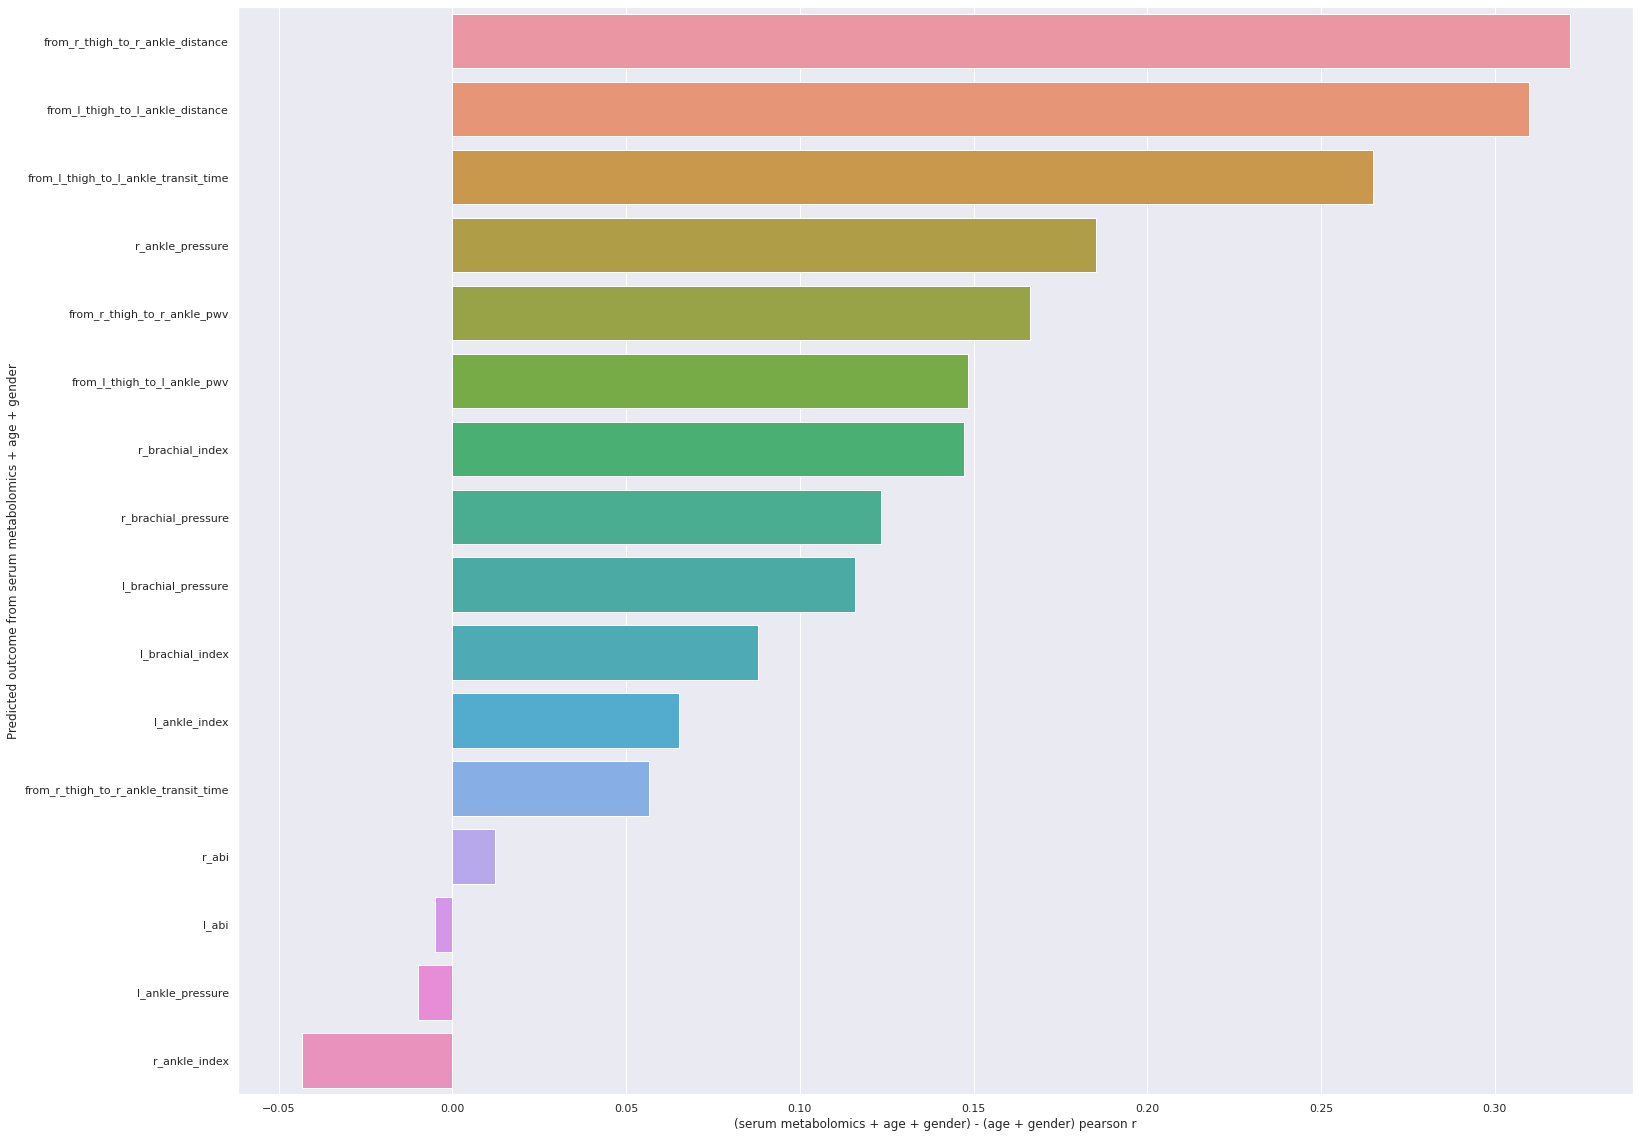

In [408]:
pearson_r_diff_abi = metrics_abi_smag.pearson_r - metrics_abi_ag.pearson_r
pearson_r_diff_abi = pearson_r_diff_abi.sort_values(ascending=False)
plt.rcParams['figure.figsize']=[25,20]
num_to_present = 50
sns.barplot(pearson_r_diff_abi[:num_to_present].values, pearson_r_diff_abi[:num_to_present].index)
plt.ylabel('Predicted outcome from serum metabolomics + age + gender')
plt.xlabel('(serum metabolomics + age + gender) - (age + gender) pearson r')
# sns.histplot(pearson_r_diff_gmb)
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/SerumMetabolomics_age_gender/ABI/barplot_pearson_r_differences_smag-ag.pdf', bbox_inches='tight')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


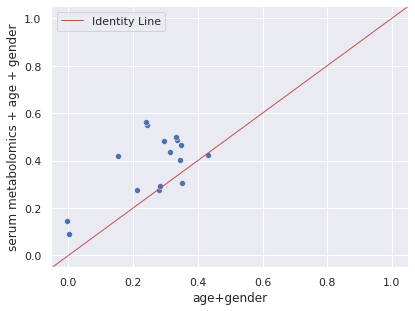

In [415]:
sns.scatterplot(metrics_abi_ag.pearson_r, metrics_abi_smag.pearson_r)
# sns.regplot(pearson_r_df.ag, pearson_r_df.smag)
# plt.xlim(plt.get_ylim)
# sns.scatterplot(pearson_r_df.sm, pearson_r_df.smag, label='serum metabolomics')
plt.rcParams['figure.figsize']=[6.4,4.8]
plt.axline((0, 0), (1, 1), linewidth=1, color='r', label='Identity Line')
plt.xlabel('age+gender')
plt.ylabel('serum metabolomics + age + gender')
plt.legend()
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/SerumMetabolomics_age_gender/ABI/pearson_r_scatter_plot.pdf', bbox_inches='tight')

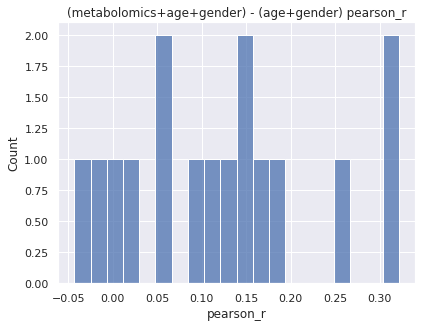

In [416]:
sns.histplot(metrics_abi_smag.pearson_r - metrics_abi_ag.pearson_r, bins = 20)
plt.title('(metabolomics+age+gender) - (age+gender) pearson_r')
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/SerumMetabolomics_age_gender/ABI/pearson_r_differences_smag-ag.pdf')

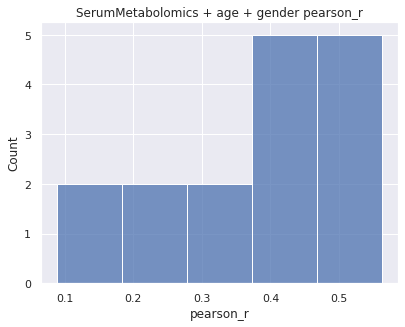

In [418]:
sns.histplot(metrics_abi_smag.pearson_r)
plt.title('SerumMetabolomics + age + gender pearson_r')
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/SerumMetabolomics_age_gender/ABI/pearson_r_smag.pdf')

In [426]:
import numpy as np
print(np.random.permutation(results_abi_smag.index))
print(results_abi_smag.index)

# results_abi_smag.index

['from_l_thigh_to_l_ankle_transit_time' 'from_l_thigh_to_l_ankle_pwv'
 'r_ankle_pressure' 'l_brachial_pressure' 'l_brachial_index'
 'l_ankle_index' 'r_brachial_pressure' 'from_r_thigh_to_r_ankle_distance'
 'l_abi' 'r_abi' 'r_ankle_index' 'from_r_thigh_to_r_ankle_pwv'
 'from_r_thigh_to_r_ankle_transit_time' 'from_l_thigh_to_l_ankle_distance'
 'r_brachial_index' 'l_ankle_pressure']
Index(['r_ankle_index', 'r_brachial_pressure', 'r_ankle_pressure',
       'r_brachial_index', 'from_l_thigh_to_l_ankle_distance',
       'from_r_thigh_to_r_ankle_transit_time', 'l_brachial_pressure',
       'from_r_thigh_to_r_ankle_pwv', 'l_ankle_index', 'r_abi',
       'from_l_thigh_to_l_ankle_transit_time', 'l_brachial_index', 'l_abi',
       'l_ankle_pressure', 'from_r_thigh_to_r_ankle_distance',
       'from_l_thigh_to_l_ankle_pwv'],
      dtype='object')


In [433]:
from scipy.stats.mstats import ttest_1samp
ttest_1samp([5,6],8)

Ttest_1sampResult(statistic=-5.0, pvalue=0.1256659163780024)

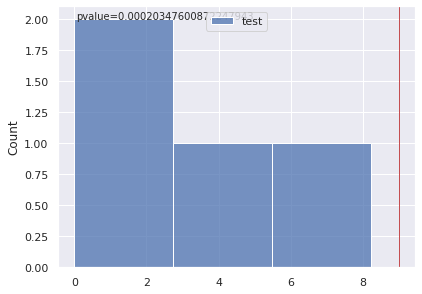

In [442]:
import statistics
import scipy.stats
a=[5,6]
mu=statistics.mean([5,6])
sigma=statistics.stdev([5,6])
z=(8-mu)/sigma
p=scipy.stats.norm.sf(z)
data=pd.DataFrame([2.3, 4, 8.22225, 0], columns=['test'])
sns.histplot(data)
plt.annotate(f'pvalue={p}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.axline((9, 0), (9, 1), linewidth=1, color='r', label='Real Pearson_r')
# plt.savefig(os.path.join(basepath, 'permutation_histogram.png'), bbox_inches='tight')

In [444]:
# import pickle
import config_local as cl

ag_ecg_perm = cl.load_pickle(os.path.join('/',cl.PREDICTIONS_PATH, 'AG_to_ECGText', 'Results_AG_to_ECGText_pickle'))
ag_ecg_perm

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
q_ms_aVR,gender age RegistrationCod...,gender age RegistrationCod...,q_ms_aVR RegistrationCode ...,q_ms_aVR RegistrationCode ...,q_ms_aVR RegistrationCode ...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': -0.0064643679...,"[0.023919761322448076, 0.023919761322448076, 0...",False
p_mv_II,gender age RegistrationCod...,gender age RegistrationCod...,p_mv_II RegistrationCode ...,p_mv_II RegistrationCode ...,p_mv_II RegistrationCode ...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.00132894217...,"[0.039650149233648554, 0.039650149233648554, 0...",False
p_mv_V4,gender age RegistrationCod...,gender age RegistrationCod...,p_mv_V4 RegistrationCode ...,p_mv_V4 RegistrationCode ...,p_mv_V4 RegistrationCode ...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.01666705323...,"[0.1356900552630467, 0.13569005526304664, 0.13...",False
s_mv_I,gender age RegistrationCod...,gender age RegistrationCod...,s_mv_I RegistrationCode ...,s_mv_I RegistrationCode ...,s_mv_I RegistrationCode ...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.08210858024...,"[0.3056088109304152, 0.30560881093041514, 0.30...",True
q_mv_V6,gender age RegistrationCod...,gender age RegistrationCod...,q_mv_V6 RegistrationCode ...,q_mv_V6 RegistrationCode ...,q_mv_V6 RegistrationCode ...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.00848768852...,"[0.09229338222881693, 0.09229338222881692, 0.0...",False
...,...,...,...,...,...,...,...,...,...
s_mv_aVL,gender age RegistrationCod...,gender age RegistrationCod...,s_mv_aVL RegistrationCode ...,s_mv_aVL RegistrationCode ...,s_mv_aVL RegistrationCode ...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.01133664052...,"[0.10250241837607424, 0.10648909701390566, 0.1...",False
st_mv_V4,gender age RegistrationCod...,gender age RegistrationCod...,st_mv_V4 RegistrationCode ...,st_mv_V4 RegistrationCode ...,st_mv_V4 RegistrationCode ...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.17398633517...,"[0.41633675841751344, 0.4227506208575923, 0.42...",False
st_mv_V1,gender age RegistrationCod...,gender age RegistrationCod...,st_mv_V1 RegistrationCode ...,st_mv_V1 RegistrationCode ...,st_mv_V1 RegistrationCode ...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.03541555060...,"[0.19476940816886099, 0.19476940816886104, 0.1...",False
q_ms_V6,gender age RegistrationCod...,gender age RegistrationCod...,q_ms_V6 RegistrationCode ...,q_ms_V6 RegistrationCode ...,q_ms_V6 RegistrationCode ...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': -0.0211973632...,"[0.12746042996980872, -0.007587292595201003, 0...",False


In [448]:
ag_ecg_perm_score = ag_ecg_perm.permutation_results
ag_ecg_perm_score.loc['q_ms_aVR']

[0.023919761322448076,
 0.023919761322448076,
 0.023919761322448087,
 0.023919761322448104,
 0.023919761322448087]

In [449]:
import Loaders
Loaders.get_physical_activity()

,HP_MET_sum_mean,HP_MET_sum_std,HP_step_sum_mean,HP_step_sum_std,HP_sum_mean,HP_sum_std,MET_max_mean,MET_mean,MET_min_mean,MET_std,...,min_high_sum_std,min_med_sum_mean,min_med_sum_std,move_min_mean,move_min_std,steps_day_mean,steps_day_std,step_min_mean_mean,step_min_mean_std,weight
participant_id,,,,,,,,,,,,,,,,,,,,,
1007330152,23.350901,17.641054,2.118018,4.826930,23.358559,17.648702,3.656887,1.911742,0.776827,1.290179,...,0.031342,23.344144,17.634369,17.563964,18.313165,2890.810811,1896.807005,26.748111,15.903600,96.300003
1012027362,30.915119,25.157496,4.337262,8.153237,31.054286,25.290874,3.816695,2.556948,1.008125,1.330499,...,0.415378,30.935476,25.175571,30.070476,26.211859,3052.614286,2399.788626,42.850821,17.483646,75.000000
1012400211,20.143396,15.963512,3.511950,7.083236,20.151258,15.970513,3.769929,2.506063,0.965145,1.314065,...,0.038063,20.135535,15.956599,18.131761,16.338748,1965.150943,1639.989662,37.057825,14.708767,70.300003
1018146705,5.638889,8.474502,0.019048,0.048673,5.638889,8.474502,2.479963,1.347725,0.910586,0.687588,...,0.000000,5.638889,8.474502,2.191270,6.148332,1084.238095,879.098965,10.179570,8.654252,67.199997
1020576262,35.635714,20.653036,0.428571,0.887084,35.635714,20.653036,3.692647,2.123241,0.961868,1.347571,...,0.000000,35.635714,20.653036,14.026190,9.772585,3107.285714,762.434634,20.009754,7.594312,53.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972023164,29.638889,14.260733,2.524306,3.142347,29.823611,14.215693,4.026033,2.320757,0.838275,1.424085,...,0.448463,29.561111,14.249309,26.590278,15.424060,3857.000000,1363.403924,36.529167,9.378504,78.500000
9973999327,25.449074,19.536751,1.176667,3.691653,25.450185,19.537370,3.780300,2.262011,0.909768,1.381927,...,0.007590,25.447593,19.536127,19.367222,18.861991,2514.433333,1765.929008,30.403674,13.919005,97.500000
9975645275,40.214103,24.989266,7.852564,8.683727,40.241026,24.983573,4.114014,2.398613,0.972234,1.357012,...,0.067884,40.187179,24.995142,36.914103,22.575190,5127.461538,2345.650323,38.695196,8.089773,58.500000


In [ ]:
pa_ag_to_sm = cl.load_pickle(os.path.join('/',cl.PREDICTIONS_PATH, 'PA_AG_to_SM', 'Results_PA_AG_to_SM_'))

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [columns]"

In [495]:
pa_ag_to_sm_signal = pa_ag_to_sm[pa_ag_to_sm.is_signal]
metrics_pa_ag_to_sm_signal = pd.json_normalize(pa_ag_to_sm_signal.results_dict)
metrics_pa_ag_to_sm_signal.index = pa_ag_to_sm_signal.index
metrics_pa_ag_to_sm_signal
pa_ag_to_sm_signal

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
Lipids_NEG_204.9809_36.9972_130.5195,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_204.9809_36.9972_...,Lipids_NEG_204.9809_36.9972_...,Lipids_NEG_204.9809_36.9972_...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': 0.00777251217...,"[0.012267407859571604, 0.054863396784265966, 0...",True
Lipids_NEG_612.3302_154.7324_257.1924,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_612.3302_154.7324...,Lipids_NEG_612.3302_154.7324...,Lipids_NEG_612.3302_154.7324...,"LGBMRegressor(bagging_fraction=0.8, bagging_fr...",{'Coefficient_of_determination': 0.00856232582...,"[0.06827711144953058, 0.06862467992818214, 0.0...",True
Lipids_NEG_391.2250_168.8265_201.9644,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_391.2250_168.8265...,Lipids_NEG_391.2250_168.8265...,Lipids_NEG_391.2250_168.8265...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': -1.9148675130...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",True
Lipids_NEG_650.4029_187.1093_267.1563,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_650.4029_187.1093...,Lipids_NEG_650.4029_187.1093...,Lipids_NEG_650.4029_187.1093...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': 0.06757949205...,"[0.27805671735052556, 0.2674048136007201, 0.27...",True
Lipids_NEG_441.2026_190.8591_220.0475,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_441.2026_190.8591...,Lipids_NEG_441.2026_190.8591...,Lipids_NEG_441.2026_190.8591...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.04692727942...,"[0.19785489102187667, 0.15637849386976335, 0.1...",True
...,...,...,...,...,...,...,...,...,...
Lipids_POS_1572.1043_351.9743_483.1614,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_1572.1043_351.974...,Lipids_POS_1572.1043_351.974...,Lipids_POS_1572.1043_351.974...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': -0.0116883133...,"[0.1333168577009897, 0.15561721458580563, 0.15...",True
Lipids_POS_949.7939_417.6540_347.9313,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_949.7939_417.6540...,Lipids_POS_949.7939_417.6540...,Lipids_POS_949.7939_417.6540...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.00727465673...,"[0.08532558177731277, 0.12956187169576933, 0.1...",True
Lipids_POS_605.7740_479.6793_280.1489,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_605.7740_479.6793...,Lipids_POS_605.7740_479.6793...,Lipids_POS_605.7740_479.6793...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.08868400888...,"[0.3532346314687351, 0.3402802565503122, 0.356...",True
Lipids_POS_1635.3120_376.0163_508.3050,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_1635.3120_376.016...,Lipids_POS_1635.3120_376.016...,Lipids_POS_1635.3120_376.016...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.01677810475...,"[0.09157316498091872, 0.07868180295798699, 0.1...",True


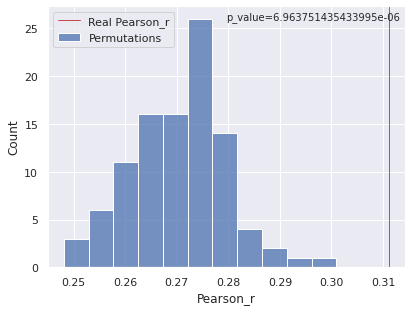

In [512]:
from LGBM import get_sample_pvalue_out_of_data
i=3
sns.histplot(pa_ag_to_sm_signal.permutation_results[i], label='Permutations')
plt.axline((metrics_pa_ag_to_sm_signal.pearson_r[i], 0), (metrics_pa_ag_to_sm_signal.pearson_r[i], 1), linewidth=1, color='r', label='Real Pearson_r')
p_value_example=get_sample_pvalue_out_of_data(pa_ag_to_sm_signal.permutation_results[i],metrics_pa_ag_to_sm_signal.pearson_r[i])[-1]
plt.xlabel('Pearson_r')
plt.annotate(f'p_value={p_value_example}', xy=(0.5,0.95), xycoords= 'axes fraction')
plt.legend()
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/Physical_Activity_age_gender/SerumMetabolomics/permutations_signal_example.pdf')

<AxesSubplot:title={'center':'Signal models'}, xlabel='p_value', ylabel='Count'>

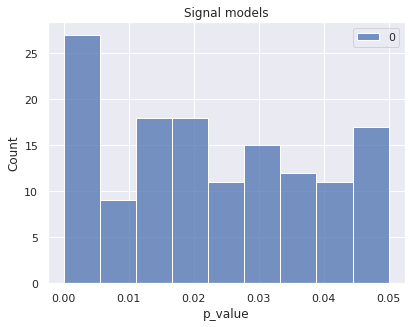

In [532]:
from scipy.stats import norm
from LGBM import get_sample_pvalue_out_of_data
p_value_pa_ag_to_sm = []
for i in range(len(pa_ag_to_sm_signal)):
    p_value_pa_ag_to_sm.append(get_sample_pvalue_out_of_data(pa_ag_to_sm_signal.permutation_results[i], metrics_pa_ag_to_sm_signal.pearson_r[i])[-1])
p_value_pa_ag_to_sm_df = pd.DataFrame(p_value_pa_ag_to_sm, index = pa_ag_to_sm_signal.index)
p_value_pa_ag_to_sm_df = p_value_pa_ag_to_sm_df[p_value_pa_ag_to_sm_df < 0.05].dropna()

plt.title('Signal models')
plt.xlabel('p_value')
# plt.xscale('log')
sns.histplot(p_value_pa_ag_to_sm_df)
# plt.annotate(f'p_value={p_value_example}', xy=(0.5,0.95), xycoords= 'axes fraction')
# plt.legend()
# plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/Physical_Activity_age_gender/SerumMetabolomics/100_permutations_signal_p_values.pdf')

In [517]:
np.argmin(p_value_pa_ag_to_sm_df)

0    6.865449e-25
dtype: float64

In [518]:
import pandas as pd
import numpy as np
# pa_ag_to_sm_pearson_r = pd.concat([metrics_pa_ag_to_sm_signal, pa_ag_to_sm_signal], ignore_index=True)
# pa_ag_to_sm_pearson_r
np.intersect1d(pa_ag_to_sm_signal.index, metrics_pa_ag_to_sm_signal.index)

array(['Lipids_NEG_1003.1680_421.7792_309.2059',
       'Lipids_NEG_1009.6795_401.3428_350.9479',
       'Lipids_NEG_1016.8042_413.4118_359.5753',
       'Lipids_NEG_1040.8033_405.9280_363.8387',
       'Lipids_NEG_1099.2705_421.0165_354.9398',
       'Lipids_NEG_1646.1353_322.0287_490.3771',
       'Lipids_NEG_165.0404_345.0695_135.6586',
       'Lipids_NEG_167.0199_320.1072_133.5837',
       'Lipids_NEG_204.9809_36.9972_130.5195',
       'Lipids_NEG_273.9781_464.9781_152.0113',
       'Lipids_NEG_277.2172_198.8968_181.4261',
       'Lipids_NEG_339.1993_486.6720_201.3258',
       'Lipids_NEG_353.3421_315.3136_205.7529',
       'Lipids_NEG_381.3730_346.1399_214.0160',
       'Lipids_NEG_391.2250_168.8265_201.9644',
       'Lipids_NEG_441.2026_190.8591_220.0475',
       'Lipids_NEG_445.2539_242.9906_221.5121',
       'Lipids_NEG_449.0418_237.0240_217.1634',
       'Lipids_NEG_461.1147_328.0631_217.9756',
       'Lipids_NEG_507.3510_254.6850_256.5377',
       'Lipids_NEG_509.0635_358.051

In [500]:
pa = Loaders.get_physical_activity()[['age', 'gender', 'bmi']]
pa

,age,gender,bmi
participant_id,,,
1007330152,63,1,36.468639
1012027362,69,0,29.480843
1012400211,60,1,25.207071
1018146705,69,0,21.768362
1020576262,41,0,21.123106
...,...,...,...
9972023164,48,1,25.342201
9973999327,63,1,31.475981
9975645275,54,0,19.546259


In [529]:
import config_local

bag_sm = config_local.load_pickle('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/BAG_to_SM/Results_BAG_to_SM_pickle')
bag_sm

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
Lipids_NEG_213.0551_31.1470_150.8722,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': -0.0500966148...,"[-0.12393074100434975, -0.12234790263547844, -...",False
Lipids_NEG_217.0025_30.9563_142.6050,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_217.0025_30.9563_...,Lipids_NEG_217.0025_30.9563_...,Lipids_NEG_217.0025_30.9563_...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': -0.0007693670...,"[0.03565263506438686, 0.032459917471129786, 0....",False
Lipids_NEG_232.9752_30.7462_142.0463,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_232.9752_30.7462_...,Lipids_NEG_232.9752_30.7462_...,Lipids_NEG_232.9752_30.7462_...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': -0.0144065776...,"[-0.044011049353068044, -0.03655599099426719, ...",False
Lipids_NEG_255.8219_33.2194_130.6976,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_255.8219_33.2194_...,Lipids_NEG_255.8219_33.2194_...,Lipids_NEG_255.8219_33.2194_...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': -0.0050362715...,"[-0.010434117674438009, -0.00940313963661564, ...",False
Lipids_NEG_162.8391_33.8351_108.4717,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_162.8391_33.8351_...,Lipids_NEG_162.8391_33.8351_...,Lipids_NEG_162.8391_33.8351_...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': -0.0017133134...,"[-0.043902567328257654, 0.04510306345575797, 0...",False
...,...,...,...,...,...,...,...,...,...
Lipids_POS_1244.3605_492.4100_354.9595,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1244.3605_492.410...,Lipids_POS_1244.3605_492.410...,Lipids_POS_1244.3605_492.410...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': -0.0043502973...,"[-0.008047173958328711, 0.08173926991070635, 0...",False
Lipids_POS_1474.1123_372.3885_474.0814,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1474.1123_372.388...,Lipids_POS_1474.1123_372.388...,Lipids_POS_1474.1123_372.388...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.00946809304...,"[0.18457136942219554, 0.1538925865736339, 0.15...",False
Lipids_POS_1797.5836_455.3832_600.0766,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1797.5836_455.383...,Lipids_POS_1797.5836_455.383...,Lipids_POS_1797.5836_455.383...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': 0.04445900776...,"[0.23060926274262597, 0.18893286413155852, 0.1...",False
Lipids_POS_1817.6462_477.9538_610.7669,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1817.6462_477.953...,Lipids_POS_1817.6462_477.953...,Lipids_POS_1817.6462_477.953...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': -0.0078303877...,"[0.07090819455911486, 0.09033111619097368, 0.1...",False


In [559]:
bag_to_sm = bag_sm
bag_to_sm_signal = bag_to_sm[bag_to_sm.is_signal]
metrics_bag_to_sm_signal = pd.json_normalize(bag_to_sm_signal.results_dict)
metrics_bag_to_sm_signal.index = bag_to_sm_signal.index
metrics_bag_to_sm_signal
bag_to_sm_signal

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
Lipids_NEG_188.9861_36.9286_129.5368,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_188.9861_36.9286_...,Lipids_NEG_188.9861_36.9286_...,Lipids_NEG_188.9861_36.9286_...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.04254779834...,"[0.11233545920594003, 0.22491661398722998, 0.1...",True
Lipids_NEG_437.0547_40.8126_207.2894,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_437.0547_40.8126_...,Lipids_NEG_437.0547_40.8126_...,Lipids_NEG_437.0547_40.8126_...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': 0.08141509538...,"[0.30622110205675035, 0.30211684742875766, 0.3...",True
Lipids_NEG_481.2803_61.9849_222.0255,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_481.2803_61.9849_...,Lipids_NEG_481.2803_61.9849_...,Lipids_NEG_481.2803_61.9849_...,"LGBMRegressor(bagging_fraction=0.5, bagging_fr...",{'Coefficient_of_determination': 0.01381186602...,"[0.11768483863443462, 0.09731402936750648, 0.0...",True
Lipids_NEG_293.1785_141.6657_180.7752,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_293.1785_141.6657...,Lipids_NEG_293.1785_141.6657...,Lipids_NEG_293.1785_141.6657...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.01031137608...,"[0.1999864400493866, 0.19967512849974303, 0.18...",True
Lipids_NEG_608.3561_167.0099_254.3956,age gender bmi Regi...,age gender bmi Regi...,Lipids_NEG_608.3561_167.0099...,Lipids_NEG_608.3561_167.0099...,Lipids_NEG_608.3561_167.0099...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.00349732035...,"[0.08241127198578224, 0.07495973631539814, 0.1...",True
...,...,...,...,...,...,...,...,...,...
Lipids_POS_1623.6196_322.1755_697.5792,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1623.6196_322.175...,Lipids_POS_1623.6196_322.175...,Lipids_POS_1623.6196_322.175...,"LGBMRegressor(bagging_fraction=1.0, bagging_fr...",{'Coefficient_of_determination': -0.0024041702...,"[0.004888090584317645, -0.057654347426790285, ...",True
Lipids_POS_1669.1245_321.2008_496.3295,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1669.1245_321.200...,Lipids_POS_1669.1245_321.200...,Lipids_POS_1669.1245_321.200...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.00241202567...,"[0.18829666314921067, 0.2574543858826854, 0.04...",True
Lipids_POS_957.8197_416.2690_363.4651,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_957.8197_416.2690...,Lipids_POS_957.8197_416.2690...,Lipids_POS_957.8197_416.2690...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': -0.0041652328...,"[0.14093035796372877, 0.17536892249945576, 0.2...",True
Lipids_POS_1517.4191_431.2351_422.1433,age gender bmi Regi...,age gender bmi Regi...,Lipids_POS_1517.4191_431.235...,Lipids_POS_1517.4191_431.235...,Lipids_POS_1517.4191_431.235...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': 0.00587997536...,"[0.08662801388602555, 0.08613704747588945, 0.0...",True


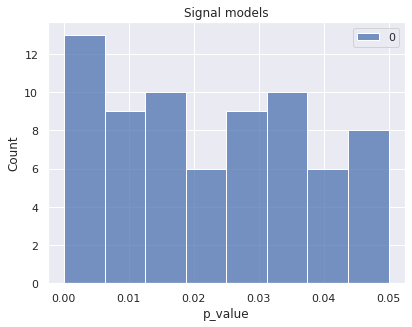

In [535]:
from LGBM import get_sample_pvalue_out_of_data
p_value_bag_to_sm = []
for i in range(len(bag_to_sm_signal)):
    p_value_bag_to_sm.append(get_sample_pvalue_out_of_data(bag_to_sm_signal.permutation_results[i], metrics_bag_to_sm_signal.pearson_r[i])[-1])
p_value_bag_to_sm_df = pd.DataFrame(p_value_bag_to_sm, index = bag_to_sm_signal.index)
p_value_bag_to_sm_df = p_value_bag_to_sm_df[p_value_bag_to_sm_df < 0.05].dropna()

plt.title('Signal models')
plt.xlabel('p_value')
# plt.xscale('log')
sns.histplot(p_value_bag_to_sm_df)
# plt.annotate(f'p_value={p_value_example}', xy=(0.5,0.95), xycoords= 'axes fraction')
# plt.legend()
plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/Bmi_Age_Gender/SerumMetabolomics/100_permutations_signal_p_values.pdf')

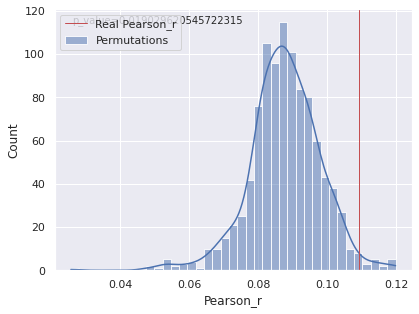

In [593]:

from LGBM import get_sample_pvalue_out_of_data
i=93
sns.histplot(bag_to_sm_signal.permutation_results[i], label='Permutations', kde=True)
plt.axline((metrics_bag_to_sm_signal.pearson_r[i], 0), (metrics_bag_to_sm_signal.pearson_r[i], 1), linewidth=1, color='r', label='Real Pearson_r')
p_value_example=get_sample_pvalue_out_of_data(bag_to_sm_signal.permutation_results[i],metrics_bag_to_sm_signal.pearson_r[i])[-1]
plt.xlabel('Pearson_r')
plt.annotate(f'p_value={p_value_example}', xy=(0.05,0.95), xycoords= 'axes fraction')
plt.legend()
# plt.savefig('/net/mraid08/export/genie/LabData/Analyses/galavner/Plots/Bmi_Age_Gender/SerumMetabolomics/permutations_signal_example.pdf')

In [555]:
p_value_bag_to_sm[np.argmin(p_value_bag_to_sm[:np.argmin(p_value_bag_to_sm)]+p_value_bag_to_sm[np.argmin(p_value_bag_to_sm):])]

nan

In [573]:
np.array(p_value_bag_to_sm)[np.array(p_value_bag_to_sm) < 0.00001]

array([3.08742320e-07, 2.49332578e-09])

In [576]:
np.where(p_value_bag_to_sm ==  0.00000000249332578)

(array([], dtype=int64),)

In [586]:
for i, x in enumerate(p_value_bag_to_sm):
    if x < 0.002:
        print(f'{i},{x}')

41,0.00036383488560467786
73,0.001959771846716895
93,3.087423195633634e-07
96,2.4933257818399056e-09
103,0.0005373522908879081
121,0.0001676451170547918
122,0.0005357944217071075
124,0.00041306596531054813
126,0.0007909433589493347


In [627]:
tmp=pd.Series(bag_to_sm_signal.permutation_results.explode())
pd.Series(tmp)

Lipids_NEG_188.9861_36.9286_129.5368      0.112335
Lipids_NEG_188.9861_36.9286_129.5368      0.224917
Lipids_NEG_188.9861_36.9286_129.5368      0.195045
Lipids_NEG_188.9861_36.9286_129.5368      0.214864
Lipids_NEG_188.9861_36.9286_129.5368      0.211286
                                            ...   
Lipids_POS_1766.5369_461.3906_591.9430    0.156608
Lipids_POS_1766.5369_461.3906_591.9430    0.166612
Lipids_POS_1766.5369_461.3906_591.9430    0.124172
Lipids_POS_1766.5369_461.3906_591.9430     0.15946
Lipids_POS_1766.5369_461.3906_591.9430    0.172562
Name: permutation_results, Length: 144000, dtype: object

In [645]:
tmp=pd.DataFrame(bag_to_sm_signal.permutation_results)
tmp2=pd.DataFrame(tmp.permutation_results.tolist())
np.sort(tmp2.T.max(axis='index'))

array([0.0078537 , 0.00984319, 0.01315547, 0.02086304, 0.0282191 ,
       0.03336091, 0.04197685, 0.04458853, 0.04592383, 0.05005143,
       0.05329568, 0.06542645, 0.08102003, 0.0815002 , 0.08453939,
       0.08491103, 0.08547707, 0.08604754, 0.0863471 , 0.08666952,
       0.08954638, 0.09279506, 0.09314012, 0.09442108, 0.09449072,
       0.09487989, 0.09923802, 0.09976714, 0.10298994, 0.10403931,
       0.10466829, 0.10597634, 0.10654516, 0.10943116, 0.11037593,
       0.11606921, 0.11792291, 0.11988619, 0.12135086, 0.1222185 ,
       0.12852132, 0.13138605, 0.1320191 , 0.13421301, 0.13604583,
       0.1434553 , 0.14439593, 0.14750248, 0.14754973, 0.14887029,
       0.14971368, 0.15190971, 0.15408089, 0.15444448, 0.15538217,
       0.16024364, 0.16252587, 0.16414249, 0.16755195, 0.16799504,
       0.17204265, 0.17283329, 0.17423148, 0.17449519, 0.17573913,
       0.18175499, 0.18205441, 0.18509125, 0.18679634, 0.18699974,
       0.19081728, 0.19464646, 0.19500327, 0.19867349, 0.20260

In [646]:
import config_local

pa_to_sm_perm = config_local.load_pickle('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/PA_to_SM_Perm/Results_SM_to_PA_pickle')
pa_to_sm_perm

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
Lipids_NEG_213.0551_31.1470_150.8722,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,Lipids_NEG_213.0551_31.1470_...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': -0.0514243302...,[{'Coefficient_of_determination': -0.053783236...,False
Lipids_NEG_217.0025_30.9563_142.6050,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_217.0025_30.9563_...,Lipids_NEG_217.0025_30.9563_...,Lipids_NEG_217.0025_30.9563_...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.00023542608...,[{'Coefficient_of_determination': -0.021651575...,False
Lipids_NEG_232.9752_30.7462_142.0463,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_232.9752_30.7462_...,Lipids_NEG_232.9752_30.7462_...,Lipids_NEG_232.9752_30.7462_...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': -0.0118029608...,[{'Coefficient_of_determination': -0.009332631...,False
Lipids_NEG_255.8219_33.2194_130.6976,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_255.8219_33.2194_...,Lipids_NEG_255.8219_33.2194_...,Lipids_NEG_255.8219_33.2194_...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': 0.00072887600...,[{'Coefficient_of_determination': -0.004050851...,False
Lipids_NEG_162.8391_33.8351_108.4717,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_NEG_162.8391_33.8351_...,Lipids_NEG_162.8391_33.8351_...,Lipids_NEG_162.8391_33.8351_...,"LGBMRegressor(bagging_fraction=0.6, bagging_fr...",{'Coefficient_of_determination': -0.0046722347...,[{'Coefficient_of_determination': -0.001353051...,False
...,...,...,...,...,...,...,...,...,...
Lipids_POS_1244.3605_492.4100_354.9595,HP_MET_sum_mean HP_MET_sum_...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_1244.3605_492.410...,Lipids_POS_1244.3605_492.410...,Lipids_POS_1244.3605_492.410...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': -0.0051915749...,[],False
Lipids_POS_1474.1123_372.3885_474.0814,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_1474.1123_372.388...,Lipids_POS_1474.1123_372.388...,Lipids_POS_1474.1123_372.388...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': 0.02176088606...,[{'Coefficient_of_determination': 0.0267555994...,False
Lipids_POS_1797.5836_455.3832_600.0766,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_1797.5836_455.383...,Lipids_POS_1797.5836_455.383...,Lipids_POS_1797.5836_455.383...,"LGBMRegressor(bagging_fraction=0.9, bagging_fr...",{'Coefficient_of_determination': 0.03399443192...,[{'Coefficient_of_determination': 0.0503606201...,False
Lipids_POS_1817.6462_477.9538_610.7669,HP_MET_sum_mean HP_MET_sum_std H...,HP_MET_sum_mean HP_MET_sum_...,Lipids_POS_1817.6462_477.953...,Lipids_POS_1817.6462_477.953...,Lipids_POS_1817.6462_477.953...,"LGBMRegressor(bagging_fraction=0.7, bagging_fr...",{'Coefficient_of_determination': -0.0316283602...,[{'Coefficient_of_determination': -0.032714322...,False


In [667]:
pa_to_sm_perm_results = pd.DataFrame(pa_to_sm_perm.permutation_results.dropna().tolist(), index = pa_to_sm_perm.index)
# pa_to_sm_perm_results = pd.DataFrame(pa_to_sm_perm.permutation_results.tolist(), index = pa_to_sm_perm.index)
# pa_to_sm_perm_results = pd.json_normalize(pa_to_sm_perm_results[0])
pa_to_sm_perm_results

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Lipids_NEG_213.0551_31.1470_150.8722,{'Coefficient_of_determination': -0.0537832363...,{'Coefficient_of_determination': -0.0513199411...,{'Coefficient_of_determination': -0.0508640814...,{'Coefficient_of_determination': -0.0508685135...,{'Coefficient_of_determination': -0.0503152107...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Lipids_NEG_217.0025_30.9563_142.6050,{'Coefficient_of_determination': -0.0216515751...,{'Coefficient_of_determination': -0.0024985736...,{'Coefficient_of_determination': -0.0002143971...,{'Coefficient_of_determination': -0.0008399009...,{'Coefficient_of_determination': -0.0021212790...,{'Coefficient_of_determination': -0.0047003664...,{'Coefficient_of_determination': -0.0001902569...,{'Coefficient_of_determination': -0.0020002096...,{'Coefficient_of_determination': -0.0005812460...,{'Coefficient_of_determination': -0.0007879271...,...,None,None,None,None,None,None,None,None,None,None
Lipids_NEG_232.9752_30.7462_142.0463,{'Coefficient_of_determination': -0.0093326314...,{'Coefficient_of_determination': -0.0116724758...,{'Coefficient_of_determination': -0.0115660887...,{'Coefficient_of_determination': -0.0121269050...,{'Coefficient_of_determination': -0.0081691361...,{'Coefficient_of_determination': -0.0124195758...,{'Coefficient_of_determination': -0.0110251309...,{'Coefficient_of_determination': -0.0116293688...,{'Coefficient_of_determination': -0.0126329623...,{'Coefficient_of_determination': -0.0090255158...,...,None,None,None,None,None,None,None,None,None,None
Lipids_NEG_255.8219_33.2194_130.6976,{'Coefficient_of_determination': -0.0040508515...,{'Coefficient_of_determination': 0.00073632540...,{'Coefficient_of_determination': 0.00123911839...,{'Coefficient_of_determination': 0.00234770135...,{'Coefficient_of_determination': 0.00059341131...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Lipids_NEG_162.8391_33.8351_108.4717,{'Coefficient_of_determination': -0.0013530510...,{'Coefficient_of_determination': 0.00028727781...,{'Coefficient_of_determination': -0.0031351477...,{'Coefficient_of_determination': -0.0015363748...,{'Coefficient_of_determination': -0.0013986527...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lipids_POS_1244.3605_492.4100_354.9595,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Lipids_POS_1474.1123_372.3885_474.0814,{'Coefficient_of_determination': 0.02675559948...,{'Coefficient_of_determination': 0.03645172421...,{'Coefficient_of_determination': 0.02768460812...,{'Coefficient_of_determination': 0.02094986717...,{'Coefficient_of_determination': 0.02843075668...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Lipids_POS_1797.5836_455.3832_600.0766,{'Coefficient_of_determination': 0.05036062013...,{'Coefficient_of_determination': 0.03279153878...,{'Coefficient_of_determination': 0.05077218460...,{'Coefficient_of_determination': 0.05316139374...,{'Coefficient_of_determination': 0.03447940560...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Lipids_POS_1817.6462_477.9538_610.7669,{'Coefficient_of_determination': -0.0327143222...,{'Coefficient_of_determination': -0.0299464473...,{'Coefficient_of_determination': -0.0602212297...,{'Coefficient_of_determination': -0.0147955250...,{'Coefficient_of_determination': -0.0376540366...,{'Coefficient_of_determination': -0.0565733993...,{'Coefficient_of_determination': -0.0093115860...,{'Coefficient_of_determination': -0.0278708398...,{'Coefficient_of_determination': -0.0056953778...,{'Coefficient_of_determination': -0.0475018192...,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
dict = {'pear': 1.9, 'sp': 33.45}
dict2={}
# for k, v in dict.items():
#     dict2[k].append(v)
# dict2
for i in range(10):
    for k, v in dict.items():
        if i==0:
            dict2[k]=[v]
        else:
            dict2[k].append(i*v)
        # print(k,v)
pd.DataFrame([dict2]).to_json('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/BAG_to_SM_Perm/test')

In [777]:
bag_to_sm_perm = config_local.load_pickle('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/BAG_to_SM_Perm/Results_BAG_to_SM_pickle')
bag_to_sm_perm
# pd.json_normalize(tmp3.permutation_results).pearson_r.to_list()

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
Lipids_POS_1670.1790_322.2303_506.5312,age bmi gender 3185923720...,age bmi gender Regi...,Lipids_POS_1670.1790_322.230...,Lipids_POS_1670.1790_322.230...,Lipids_POS_1670.1790_322.230...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': -0.0016924542...,"[[0.061038051873358104], [0.07006648554498607]...",False


In [775]:
pearson_r_df.sample(frac = 1)

,smag,ag,sm
bt__creatinine,0.709256,0.665128,0.658402
bt__non_hdl_cholesterol,0.708781,0.216995,0.707606
bt__rbc_micro%,0.068816,0.062331,0.149570
bt__hdl_cholesterol,0.766435,0.445823,0.767562
bt__neutrophils_abs,0.396954,0.119176,0.394265
...,...,...,...
bt__monocytes_abs,0.339784,0.153762,0.332964
bt__mean_platelet_volume,0.123315,0.066018,0.125552
bt__crp_wide_range,0.114742,0.090932,0.083772
bt__crp_synthetic,0.098688,0.090037,0.145594


In [778]:
config_local.load_pickle('/net/mraid08/export/genie/LabData/Analyses/galavner/Predictions/BAG_to_SM_Perm/Results_BAG_to_SM_pickle')

,x_train,x_test,y_train,y_test,y_pred,model,results_dict,permutation_results,is_signal
Lipids_POS_1670.1790_322.2303_506.5312,age bmi gender 3185923720...,age bmi gender Regi...,Lipids_POS_1670.1790_322.230...,Lipids_POS_1670.1790_322.230...,Lipids_POS_1670.1790_322.230...,"LGBMRegressor(bagging_fraction=0.4, bagging_fr...",{'Coefficient_of_determination': -0.0016924542...,"[[0.061038051873358104], [0.07006648554498607]...",False
